In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn import neighbors
from sklearn import preprocessing
from scipy import stats
from sklearn import tree
from sklearn.model_selection import cross_val_score
import time
from sklearn import ensemble
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



Data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [3]:
df = pd.read_csv('train (1).csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [6]:
df.isnull().sum().max()

1453

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df_missingData = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(df_missingData.head(20))
df.isnull().sum().max()

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

1453

In [8]:
df_dropped = df.drop(df_missingData[(df_missingData.Percent > .15)].index, axis=1)

In [9]:
df_dropped.isnull().sum().max()

81

In [10]:
#drop null rows
df_dropped = df_dropped.dropna()
df_dropped.isnull().sum().max()

0

In [11]:
# drop id column
df_dropped = df_dropped.drop('Id',axis=1)

In [12]:
df_dropped.shape

(1338, 74)

In [13]:
# identify columns in numeric and text columns
cols = df_dropped.columns
numCols = df_dropped._get_numeric_data().columns
catTxtCols = list(set(cols) - set(numCols))

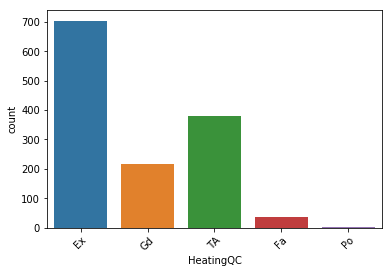

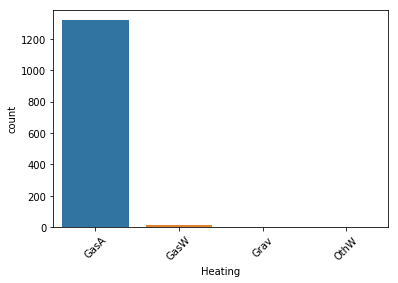

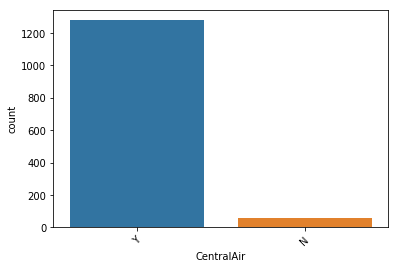

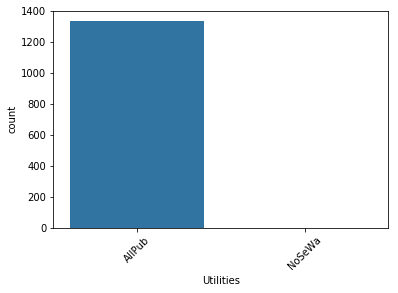

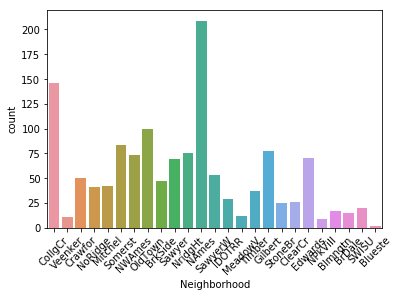

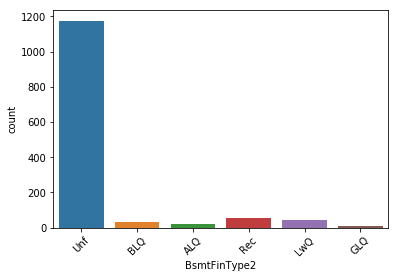

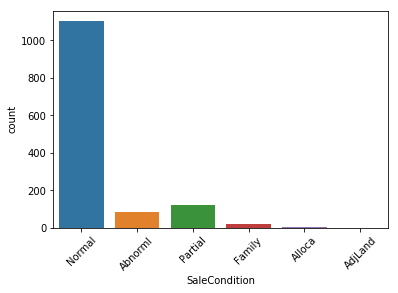

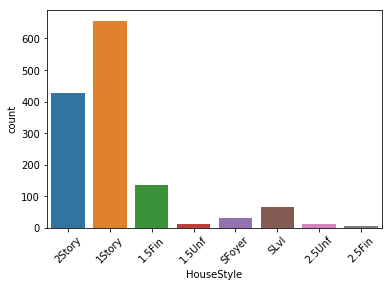

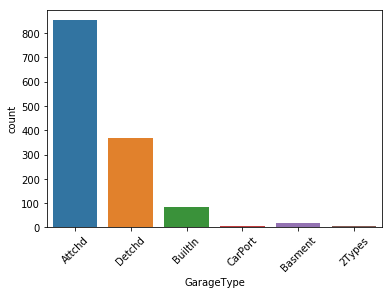

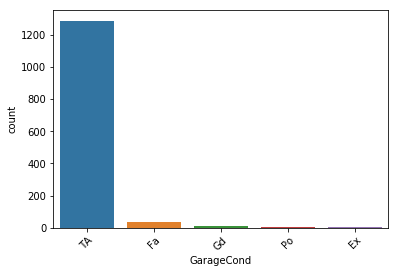

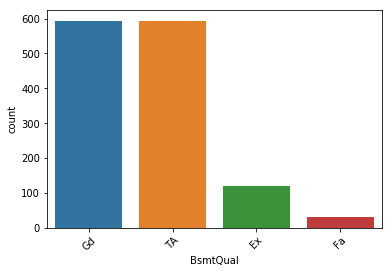

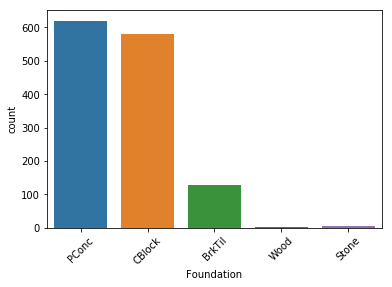

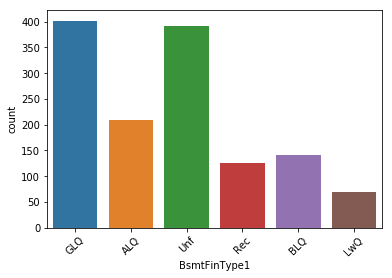

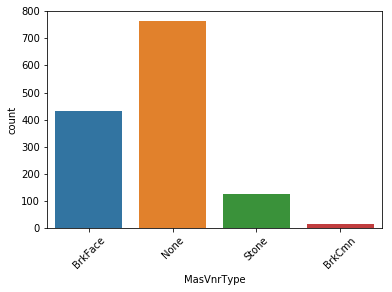

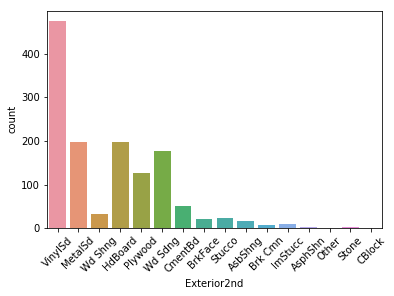

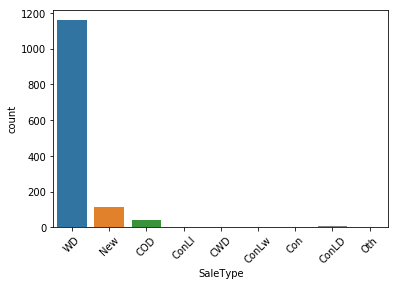

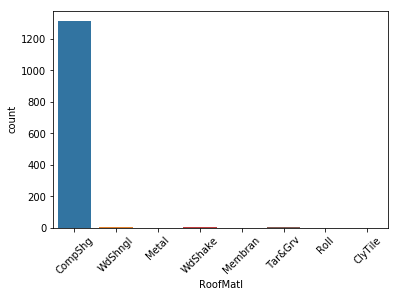

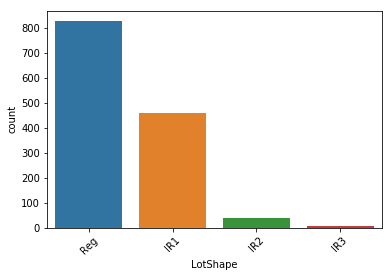

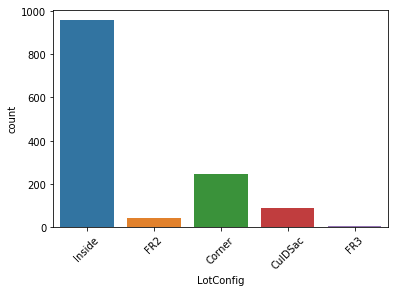

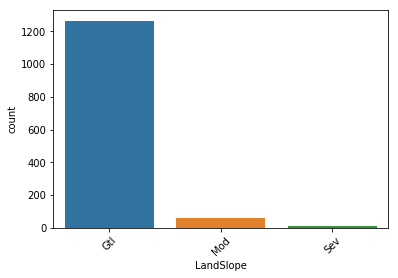

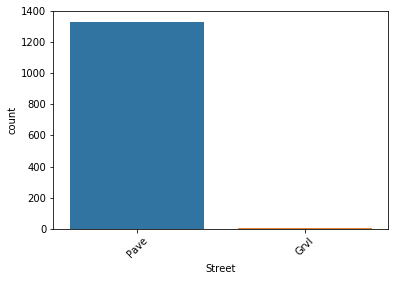

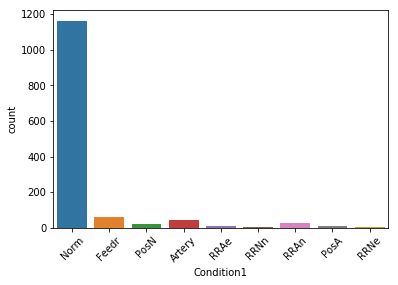

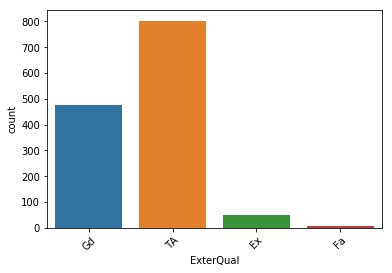

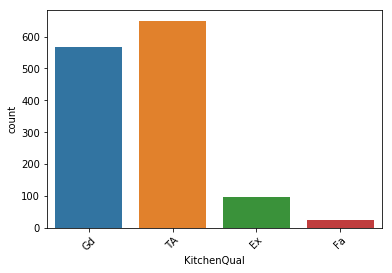

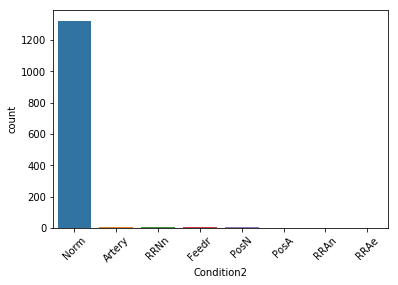

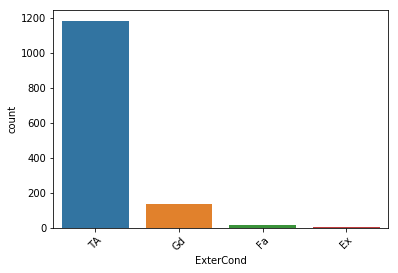

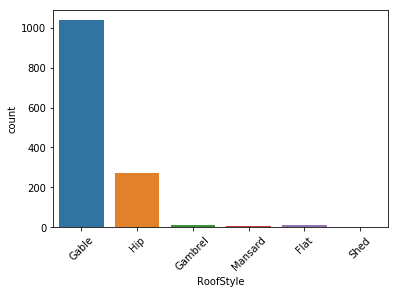

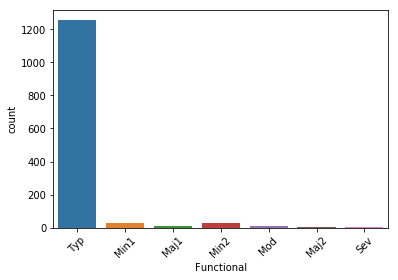

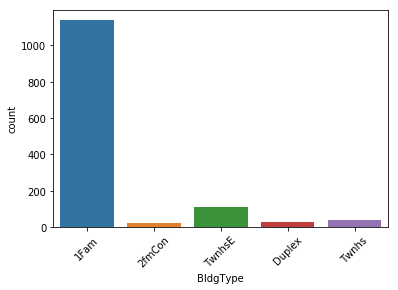

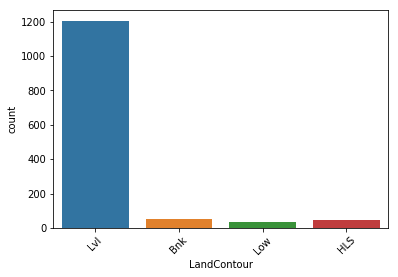

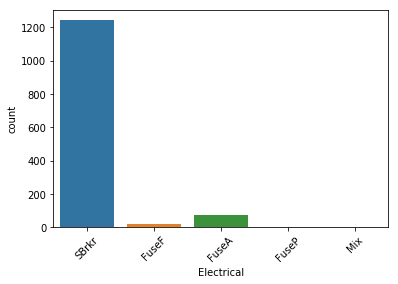

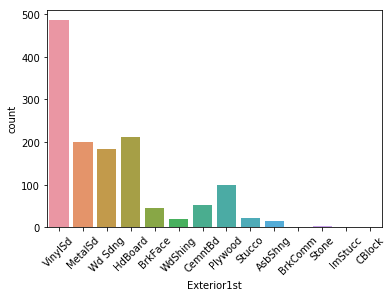

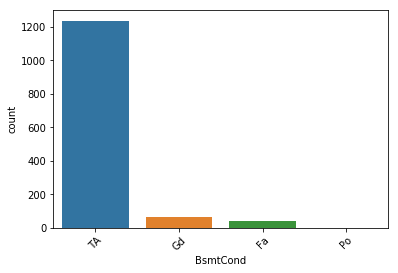

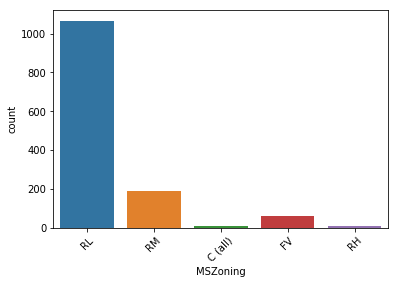

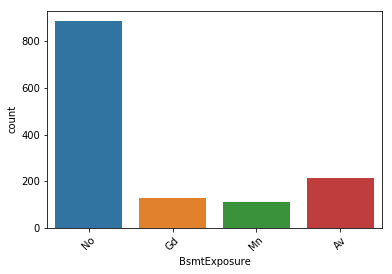

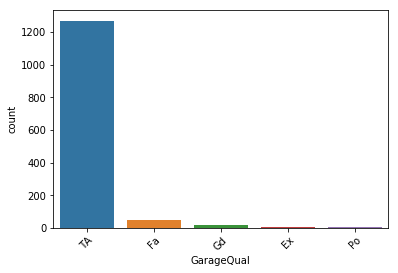

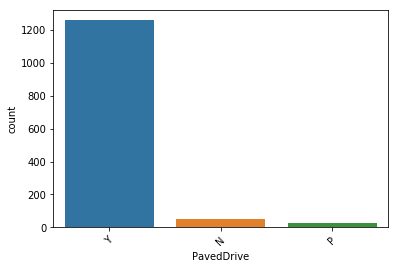

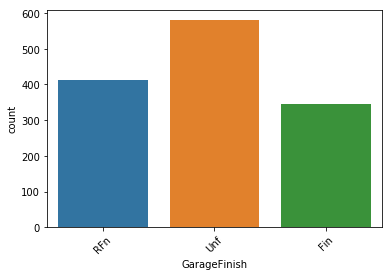

In [14]:
for col in catTxtCols:
    g = sns.countplot(x=col, data=df_dropped)
    plt.setp(g.get_xticklabels(), rotation=45)
    plt.show()

In [15]:
yearCatCols = ['YearBuilt', 'GarageYrBlt', 'YearRemodAdd']

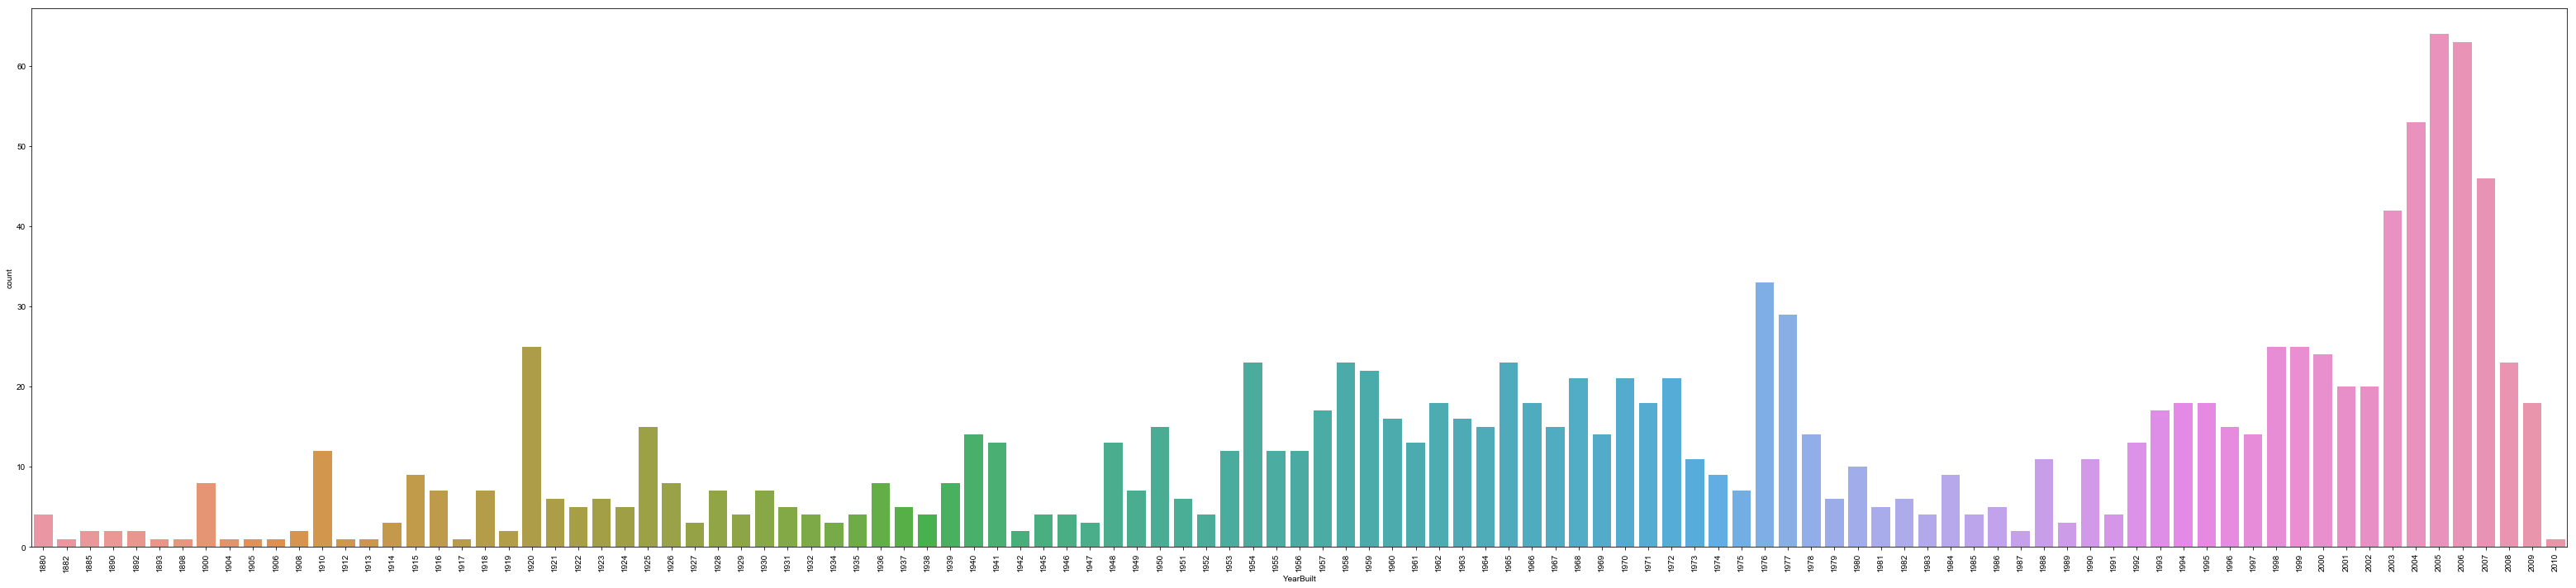

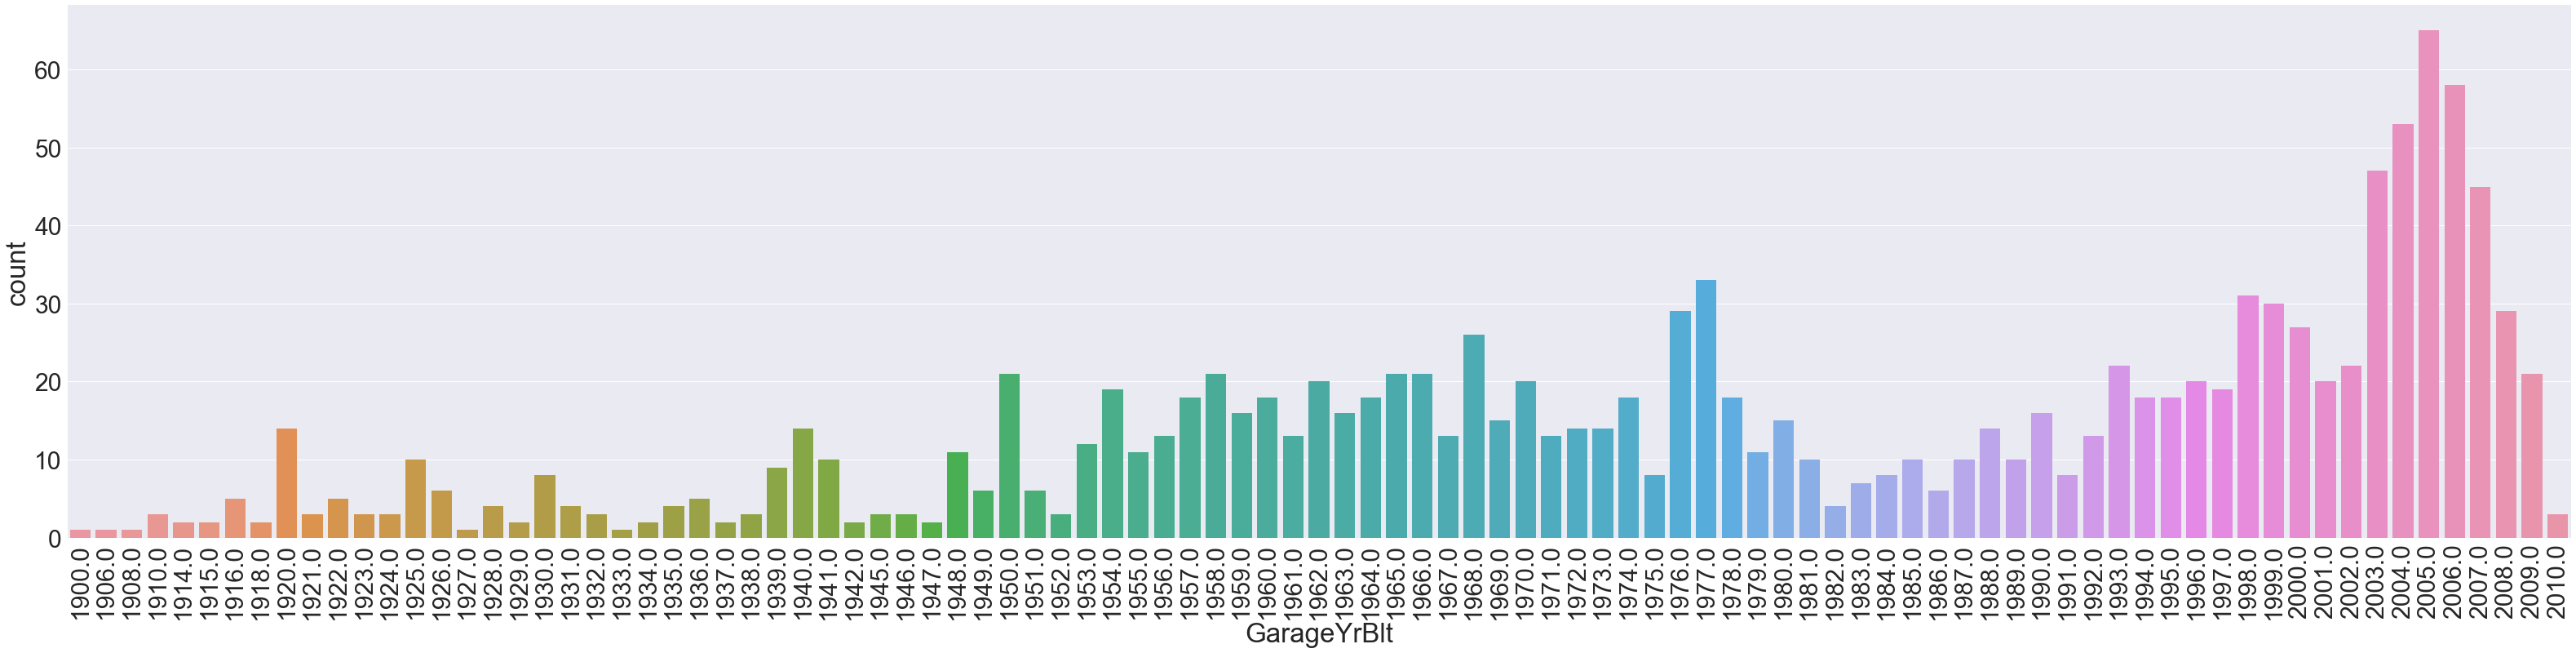

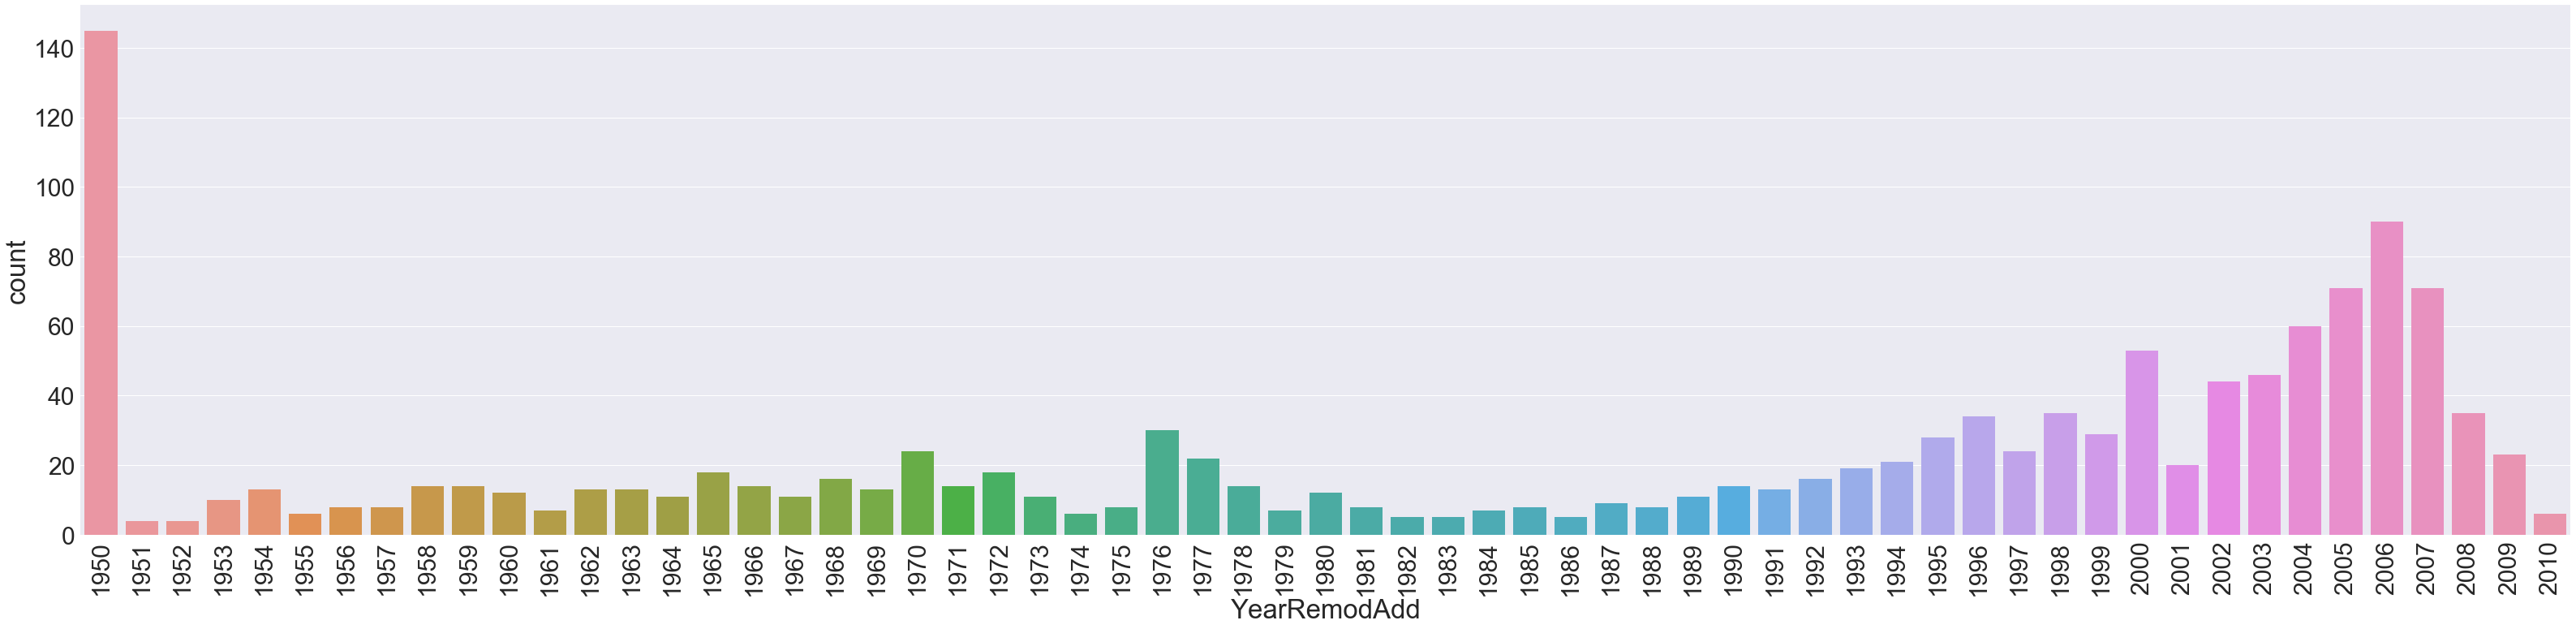

In [16]:
for col in yearCatCols:
    f, ax = plt.subplots(figsize=(55,12))
    sns.set(font_scale = 3)
    fig = sns.countplot(x=col, data=df_dropped)
    x = plt.xticks(rotation=90)

In [17]:
numCatCols = ['Fireplaces',
              'OverallQual',
              'OverallCond',
              'BsmtFullBath',
              'BsmtHalfBath',
              'FullBath',
              'MoSold',
              'GarageCars',
              'KitchenAbvGr',
              'BedroomAbvGr',
              'YrSold',
             'TotRmsAbvGrd',
             'HalfBath',
             'MSSubClass']

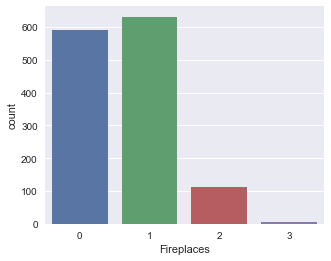

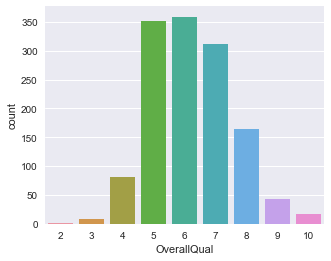

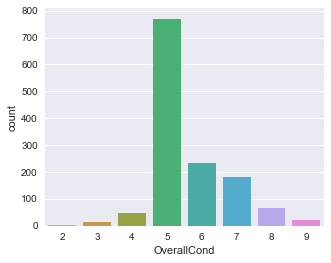

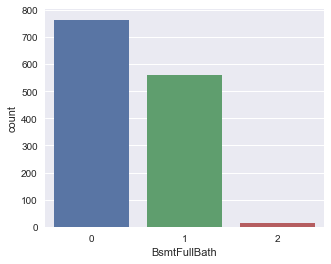

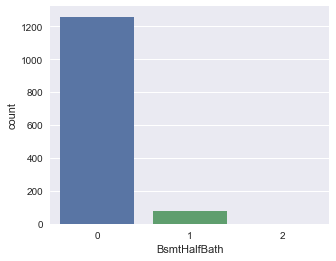

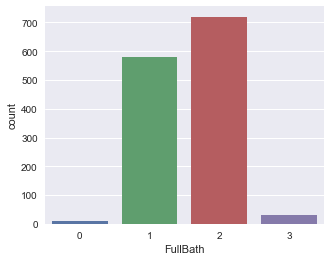

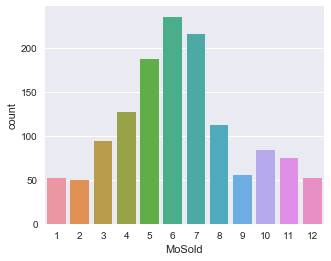

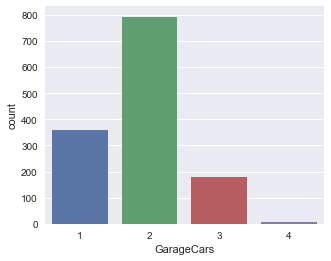

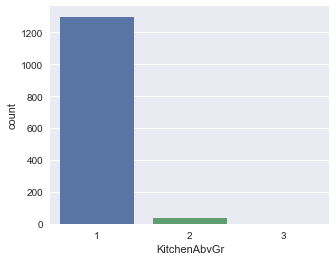

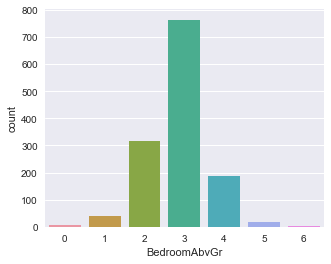

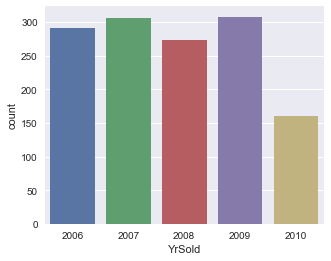

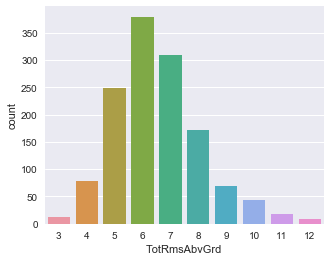

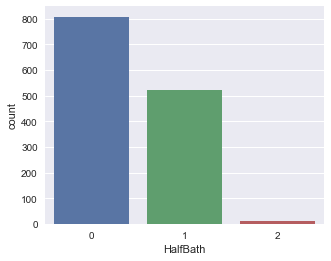

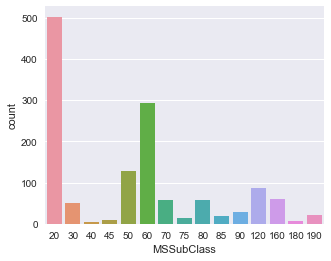

In [18]:
for col in numCatCols:
    sns.set(font_scale = 1)
    f, ax = plt.subplots(figsize=(5,4))
    fig2 = sns.countplot(x=col, data=df_dropped)
    #x = plt.xticks(rotation=90)
    plt.show()

In [19]:
def BoxHist(column, df_focus):
    
    sns.set()
    colList = df_focus[column]
    
    # plots
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=column, data=df_focus)
    
    plt.subplot(1, 2, 2)
    g=sns.distplot(colList, kde=False, bins=10)
    
    # rotate label for large tick values on histagram x axis
    if (colList.max() > 9999):
        plt.setp(g.get_xticklabels(), rotation=45)

    plt.show()

In [20]:
contCols = list(set(numCols)-set(numCatCols)-set(yearCatCols))

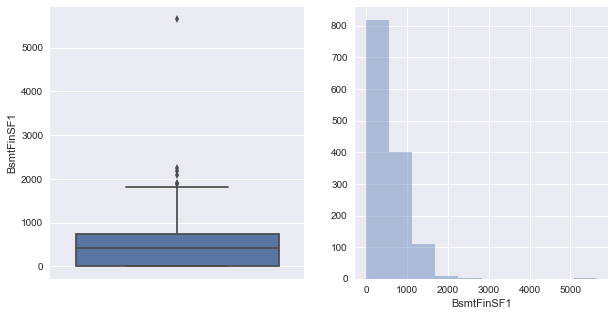

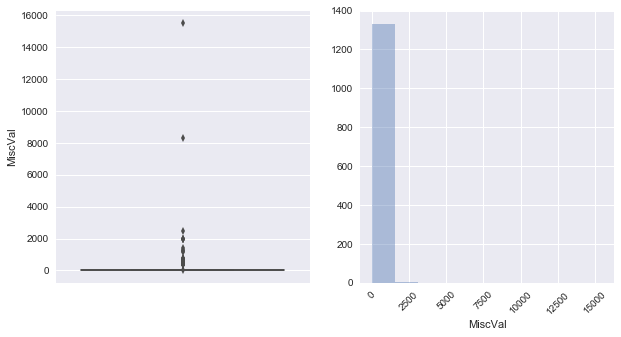

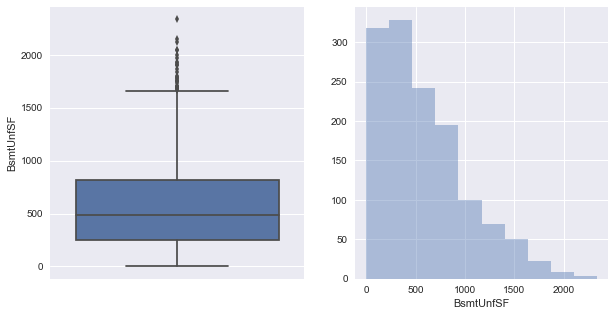

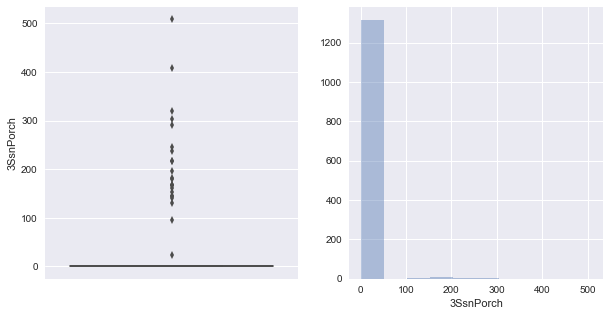

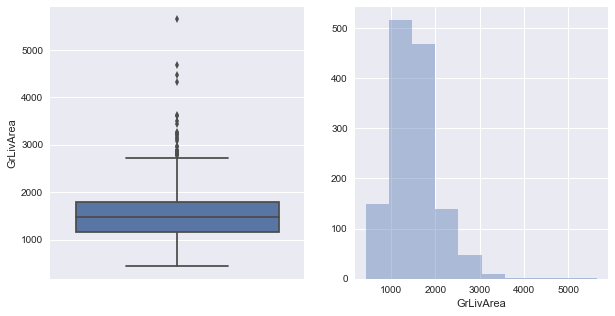

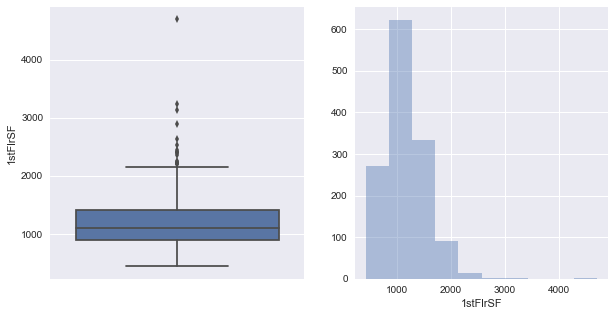

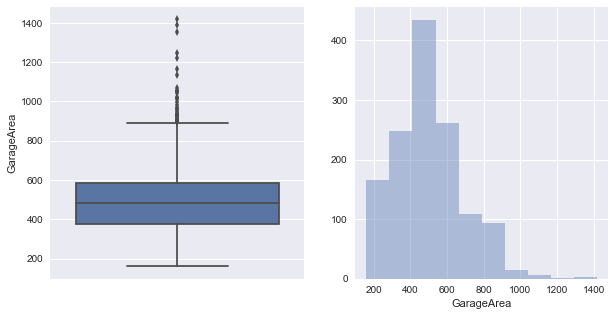

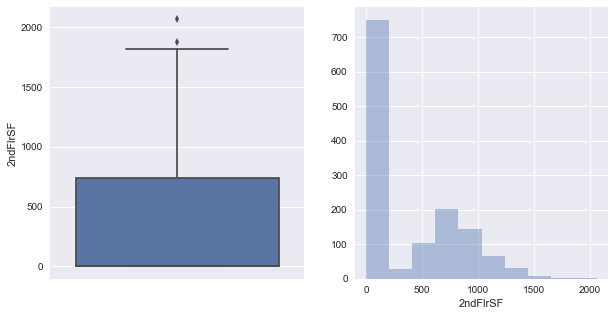

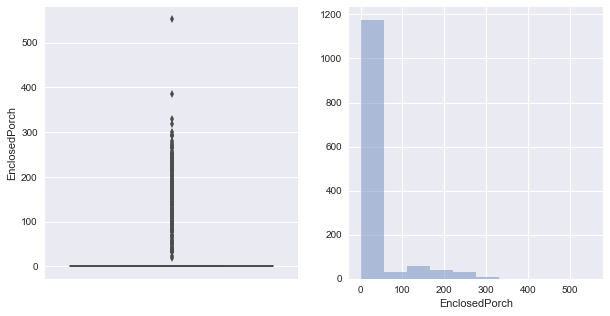

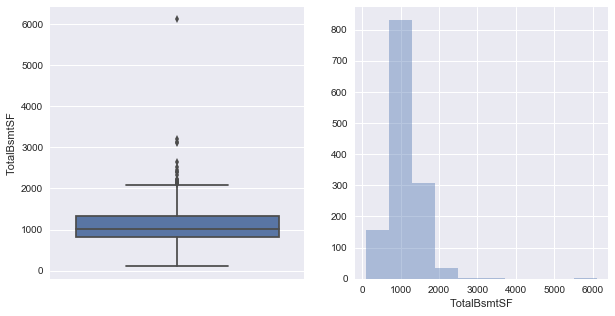

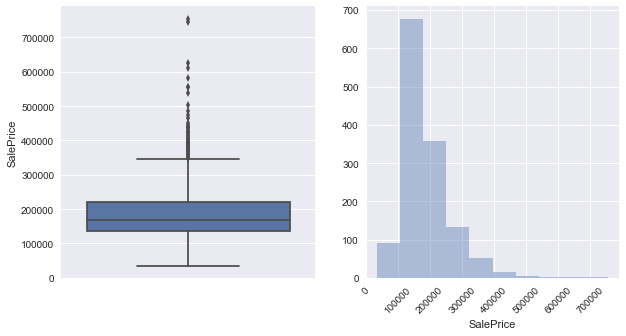

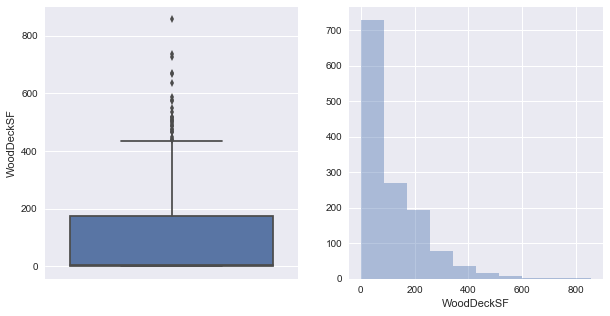

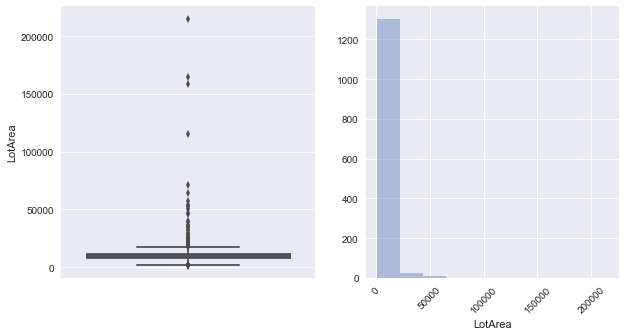

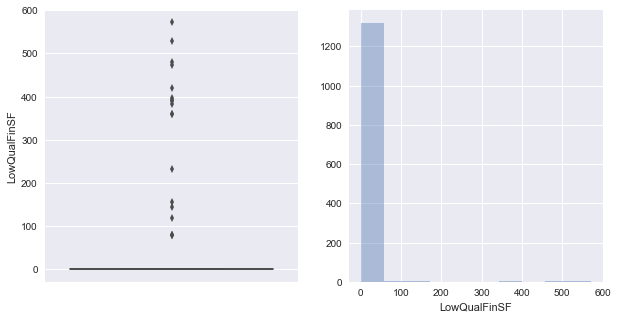

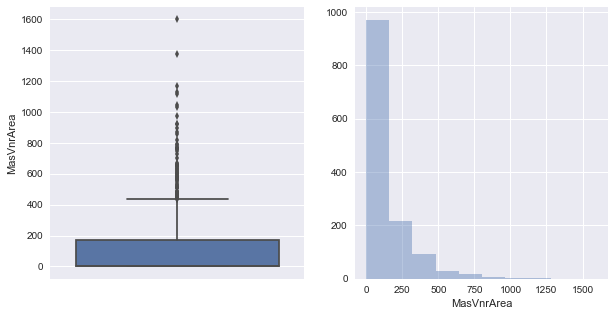

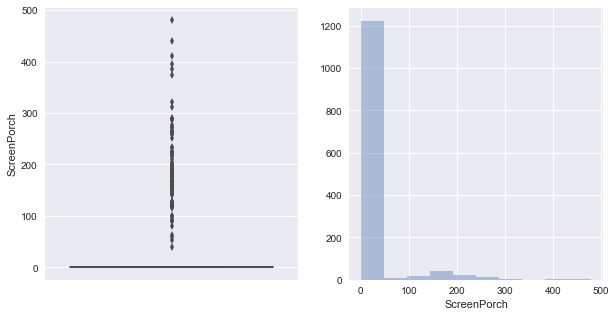

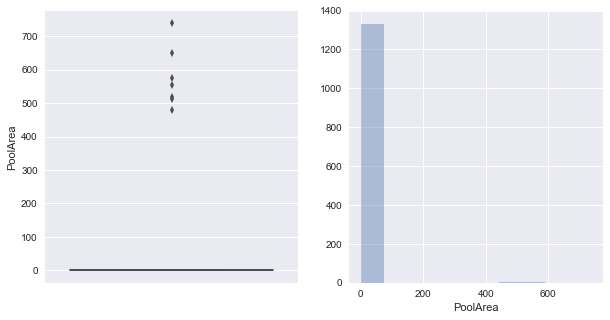

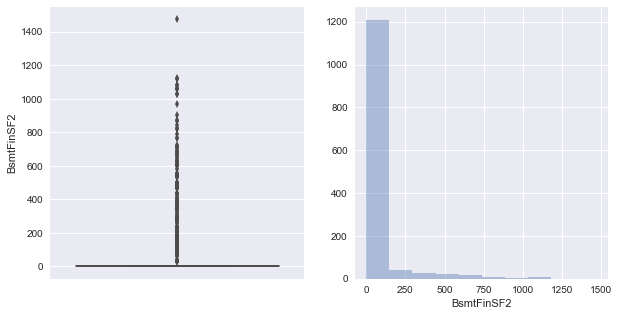

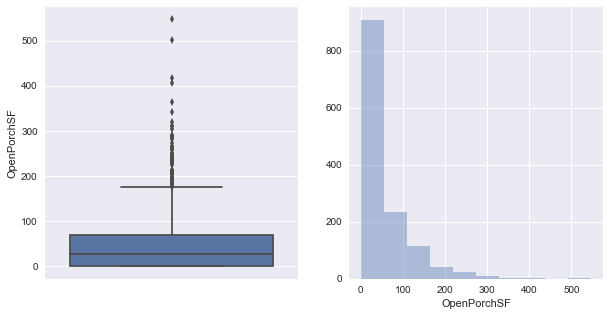

In [21]:
for col in contCols:
    BoxHist(col,df_dropped)

In [30]:
contCols

['BsmtFinSF1',
 'MiscVal',
 'BsmtUnfSF',
 '3SsnPorch',
 'GrLivArea',
 '1stFlrSF',
 'GarageArea',
 '2ndFlrSF',
 'EnclosedPorch',
 'TotalBsmtSF',
 'SalePrice',
 'WoodDeckSF',
 'LotArea',
 'LowQualFinSF',
 'MasVnrArea',
 'ScreenPorch',
 'PoolArea',
 'BsmtFinSF2',
 'OpenPorchSF']

In [31]:
corrmat = df_dropped[contCols].corr()
display(corrmat[abs(corrmat.SalePrice) >= .30].SalePrice.sort_values(ascending=False))
contColsHighCorr = corrmat[abs(corrmat.SalePrice) >= .30].SalePrice.sort_values(ascending=False).index
contColsLowCorr = list(set(contCols)-set(contColsHighCorr))

SalePrice      1.000000
GrLivArea      0.711706
GarageArea     0.607535
1stFlrSF       0.604714
TotalBsmtSF    0.602042
MasVnrArea     0.465811
BsmtFinSF1     0.359677
OpenPorchSF    0.322786
2ndFlrSF       0.311354
WoodDeckSF     0.305983
Name: SalePrice, dtype: float64

In [32]:
#df_dropped['ScreenPorch']
df_dropped[contCols].shape

(1338, 19)

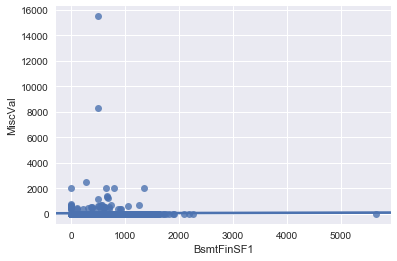

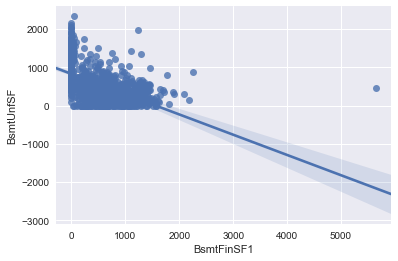

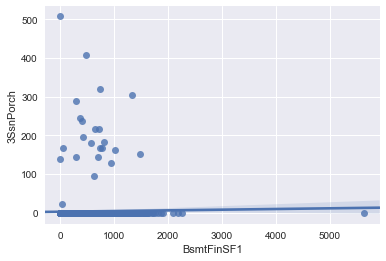

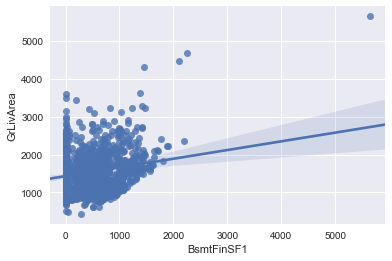

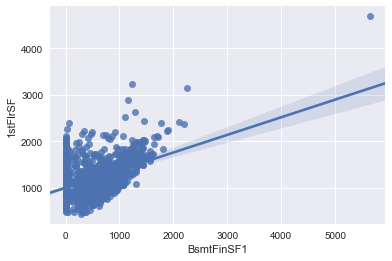

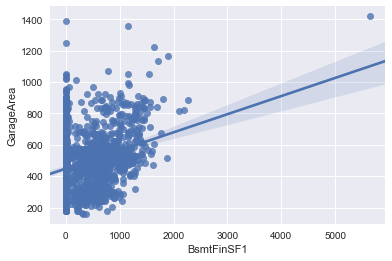

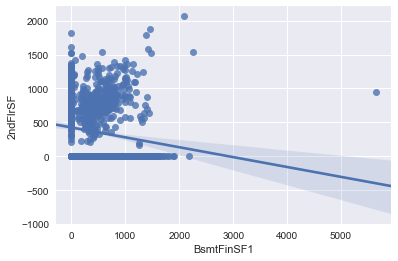

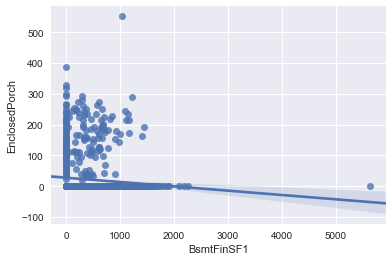

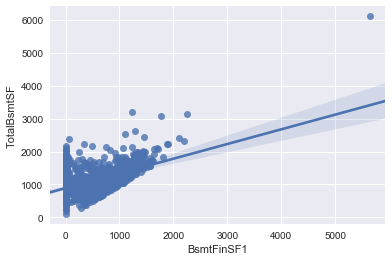

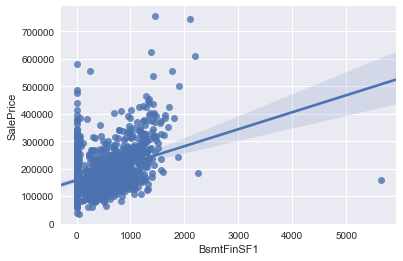

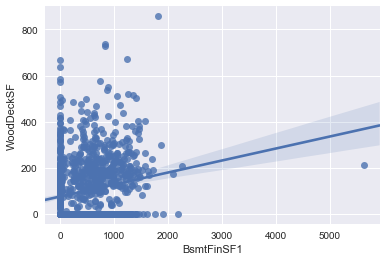

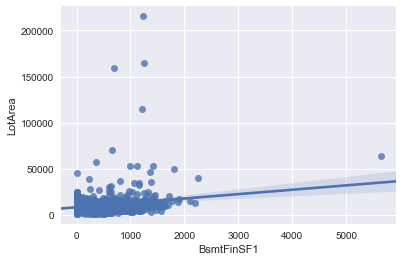

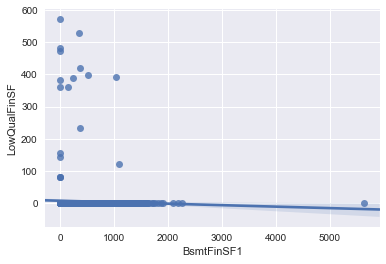

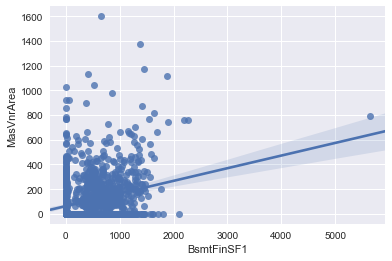

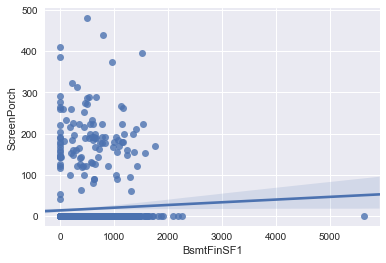

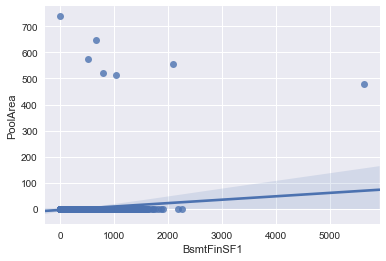

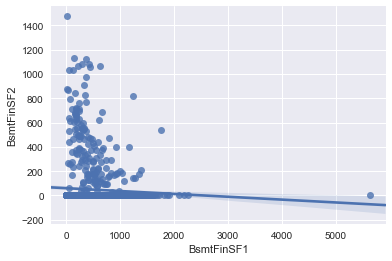

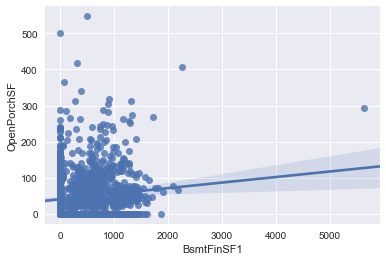

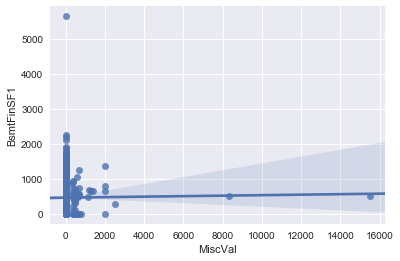

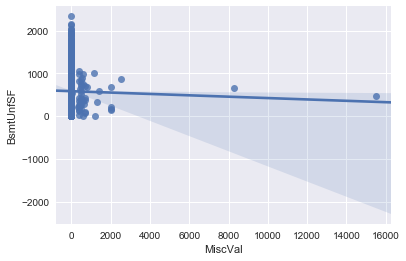

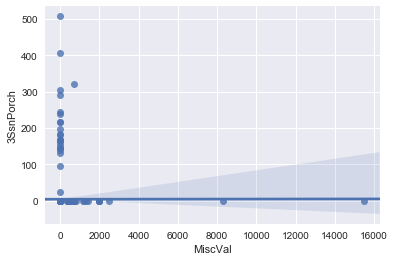

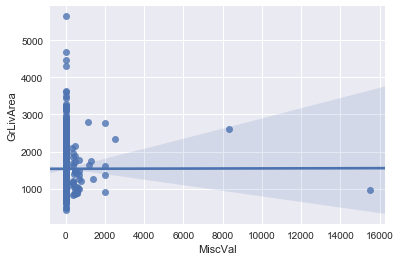

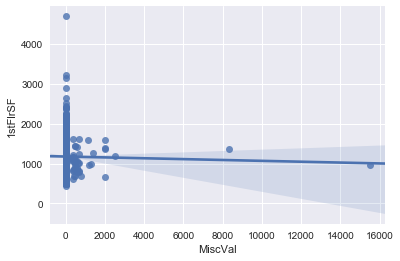

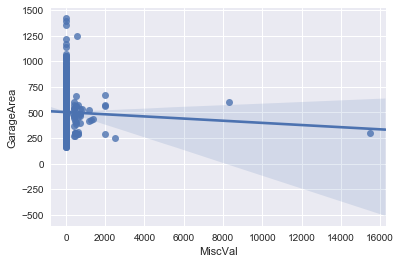

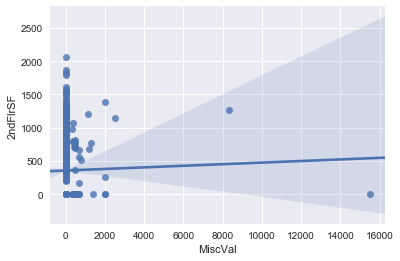

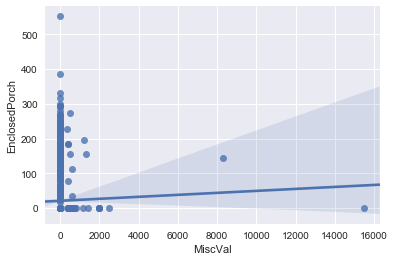

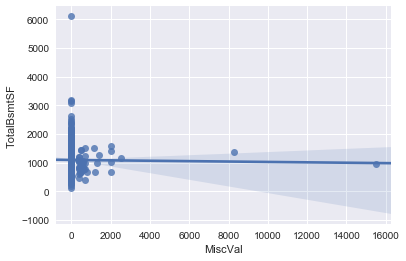

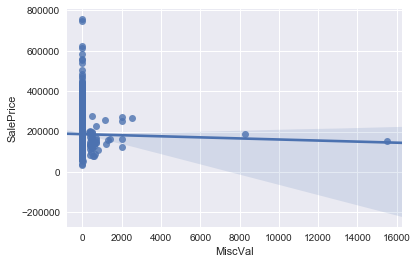

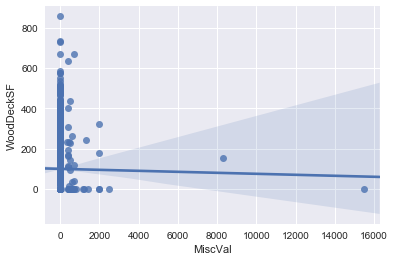

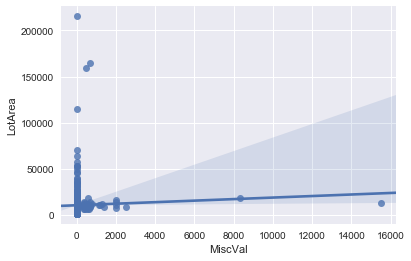

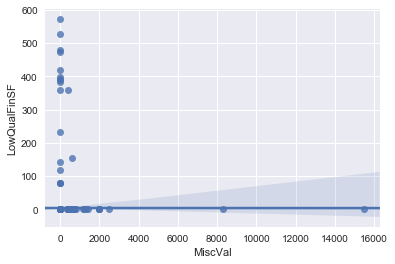

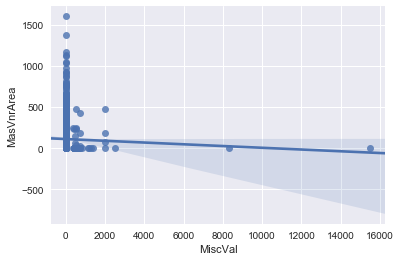

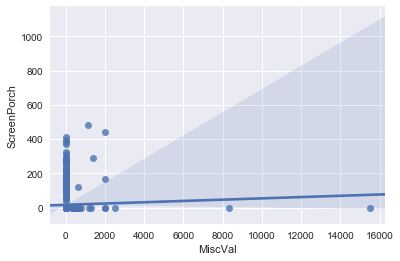

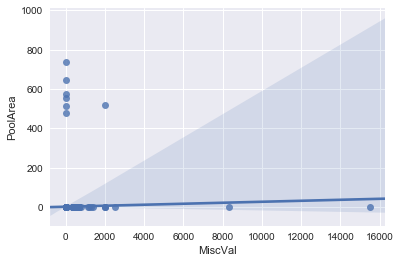

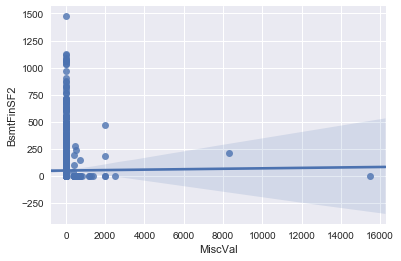

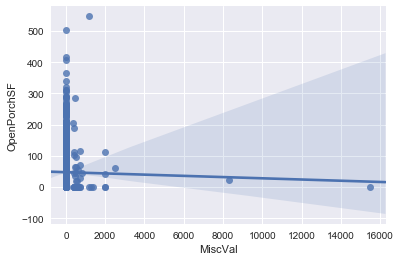

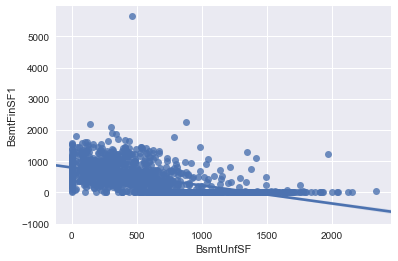

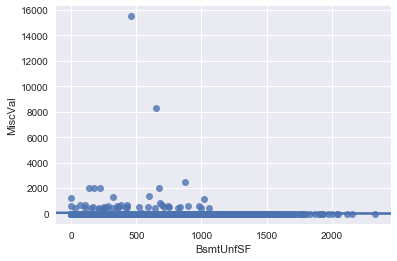

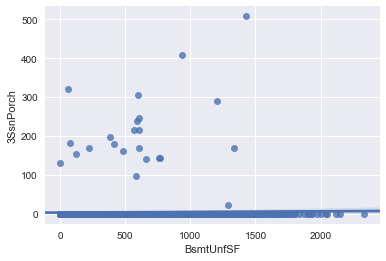

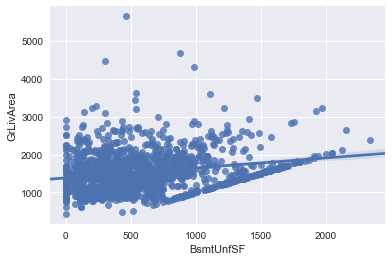

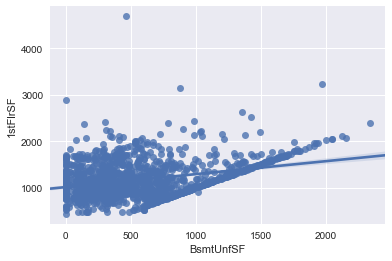

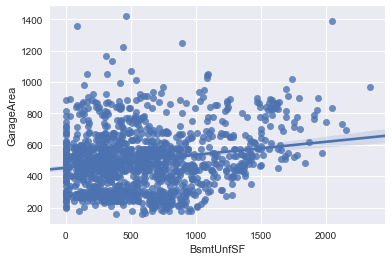

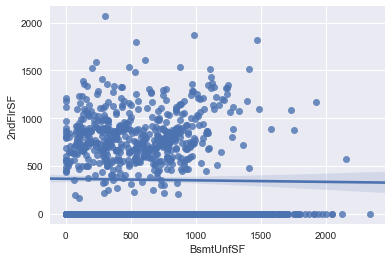

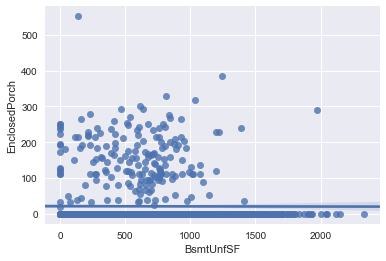

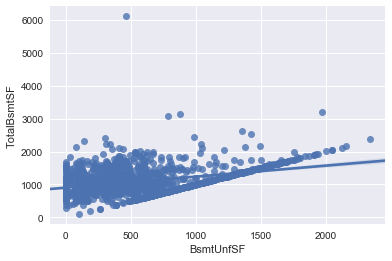

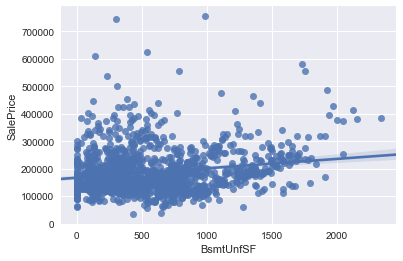

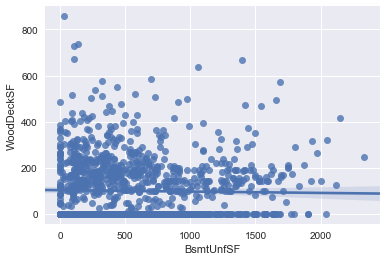

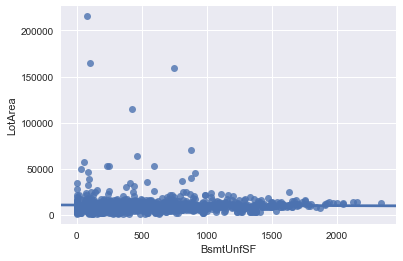

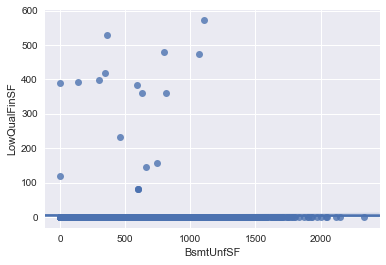

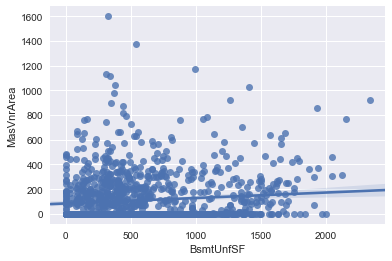

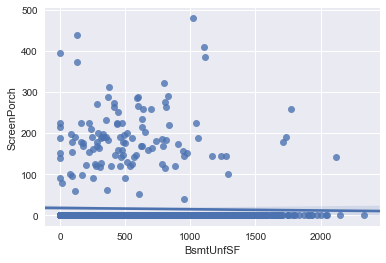

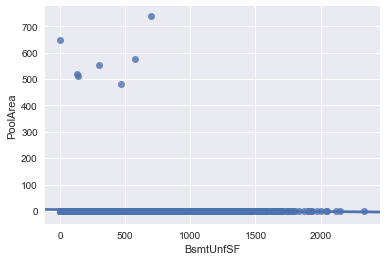

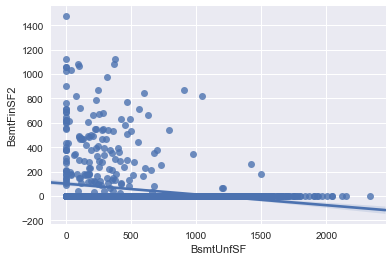

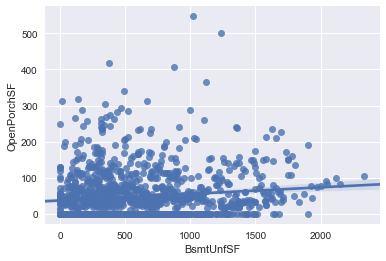

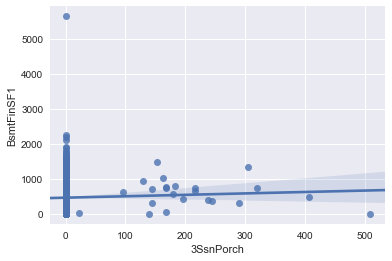

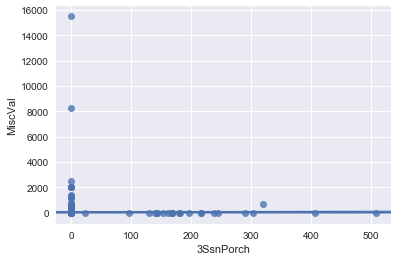

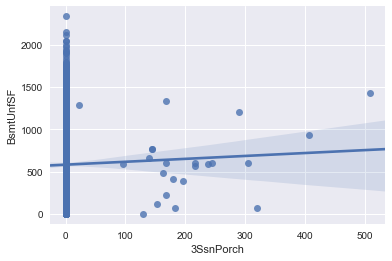

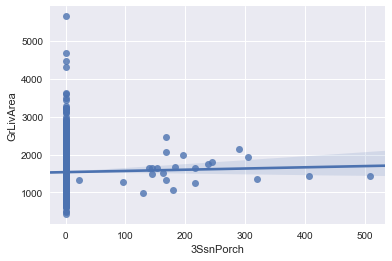

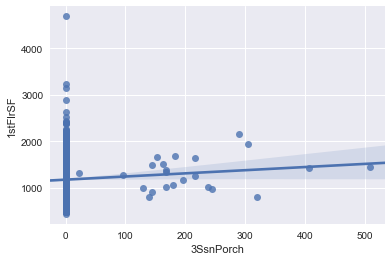

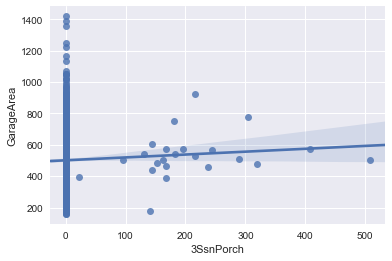

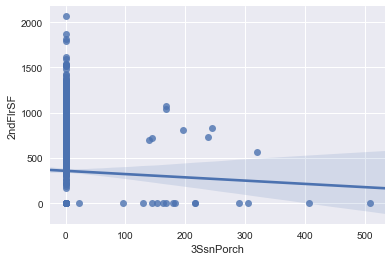

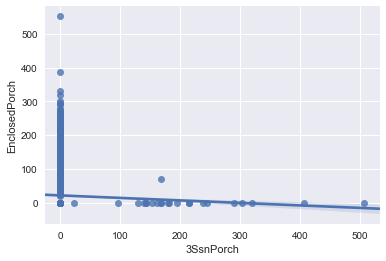

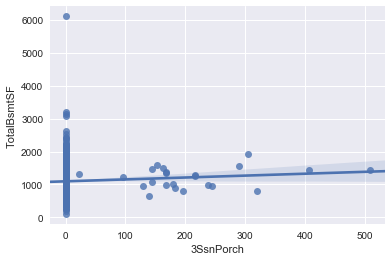

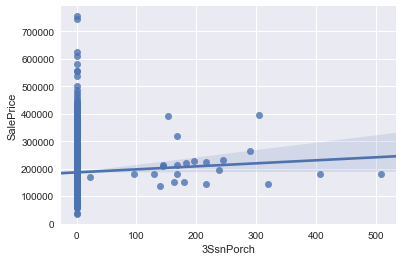

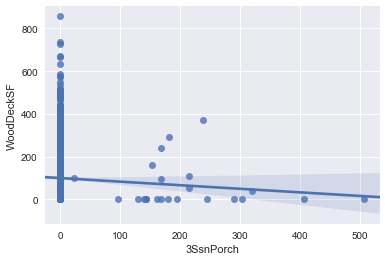

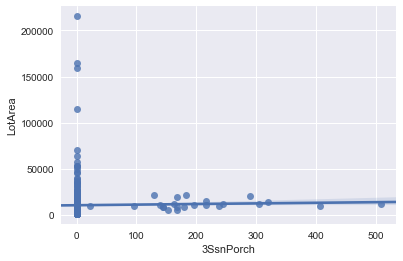

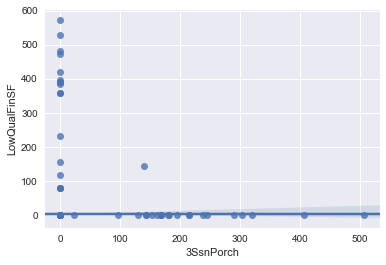

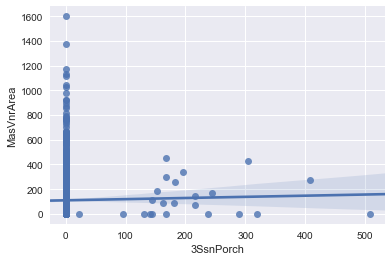

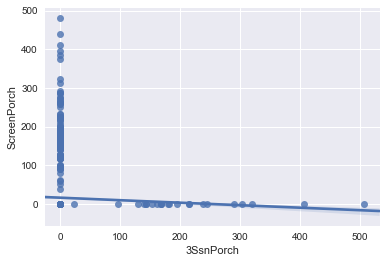

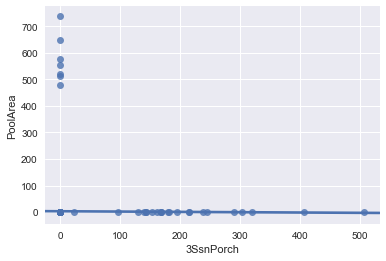

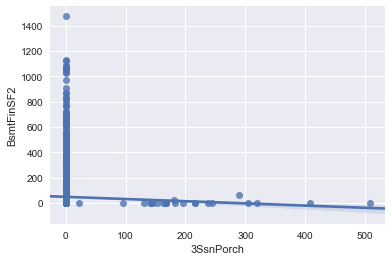

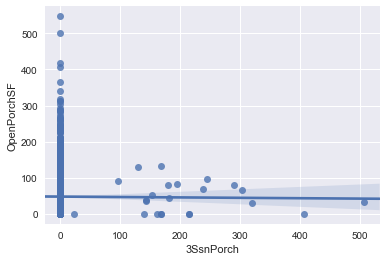

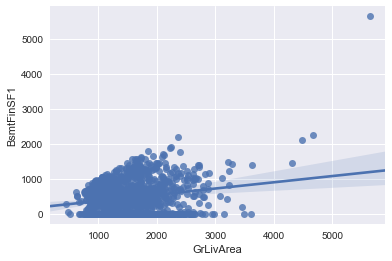

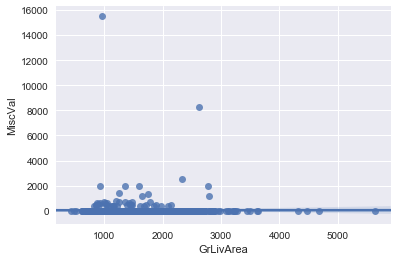

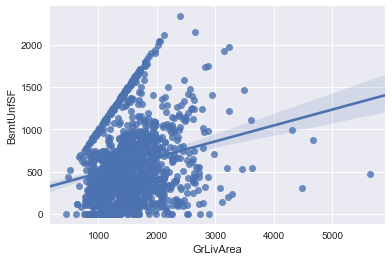

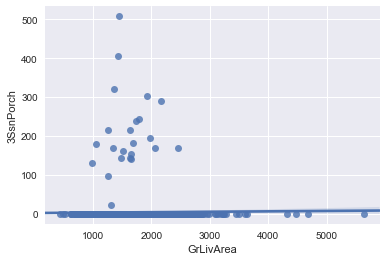

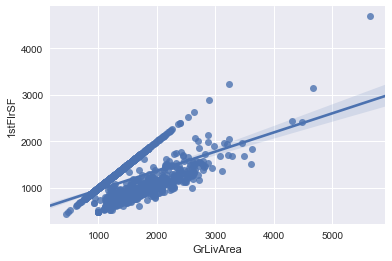

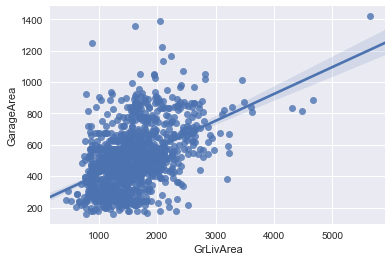

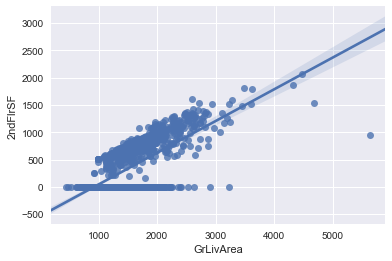

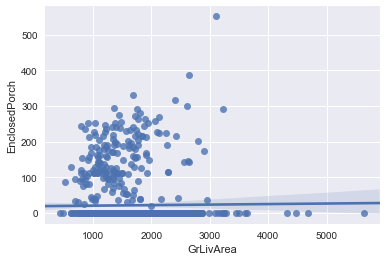

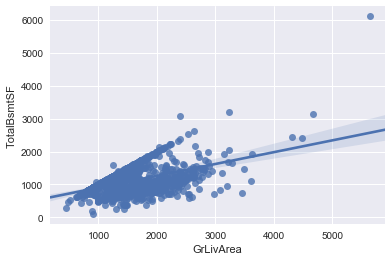

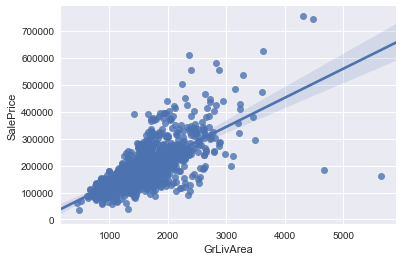

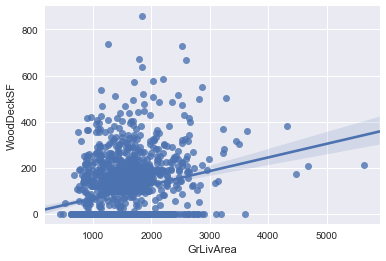

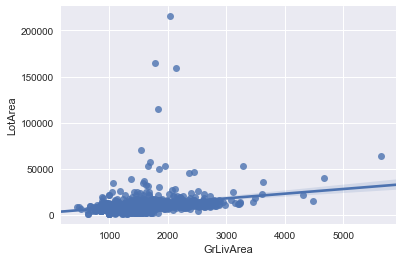

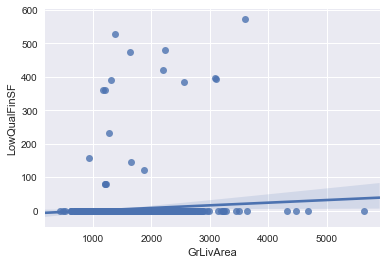

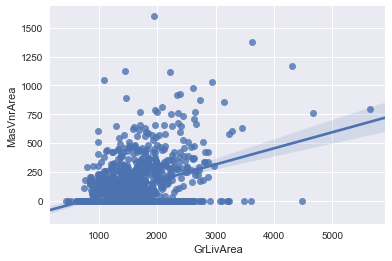

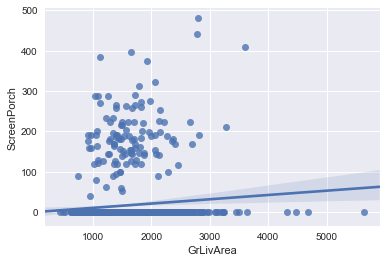

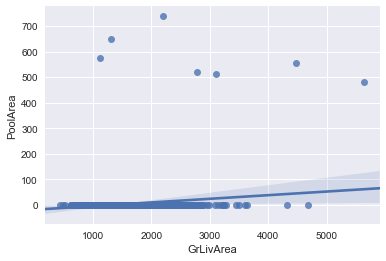

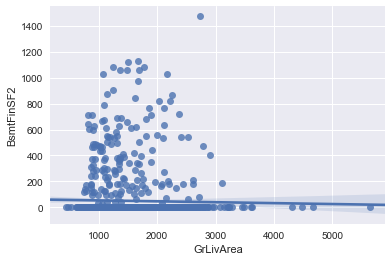

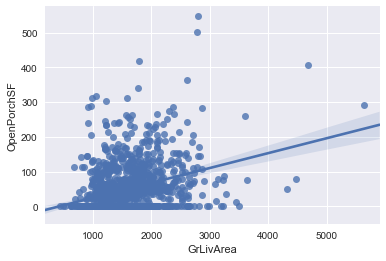

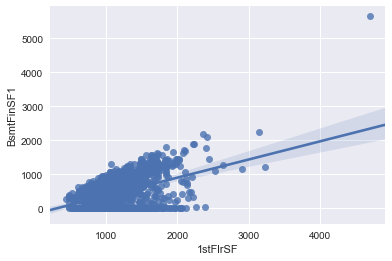

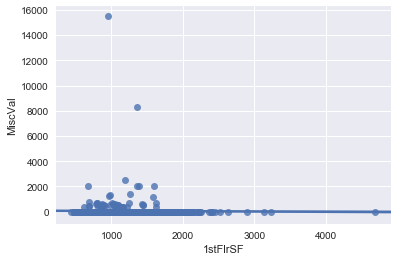

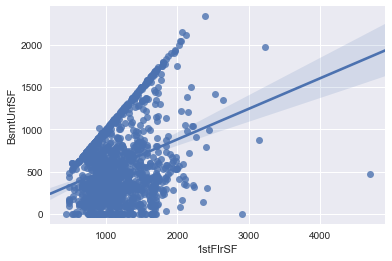

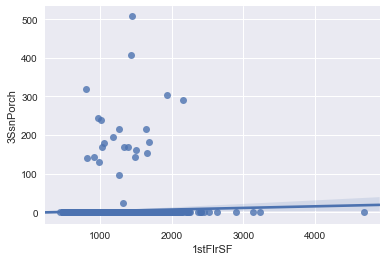

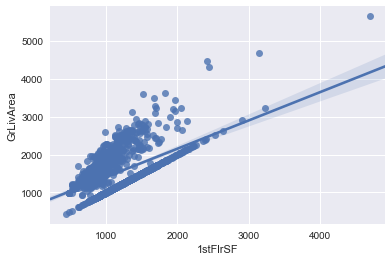

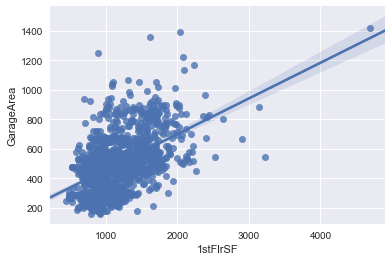

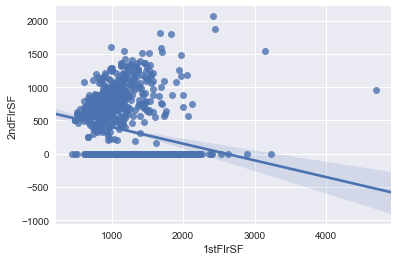

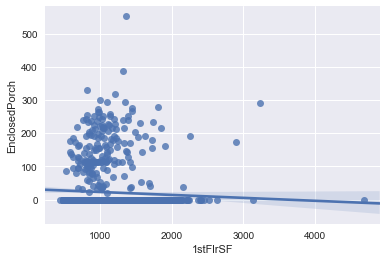

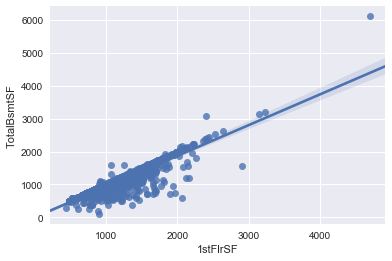

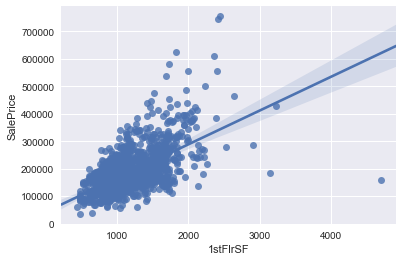

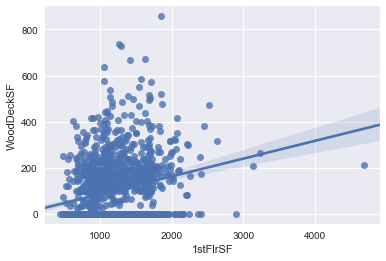

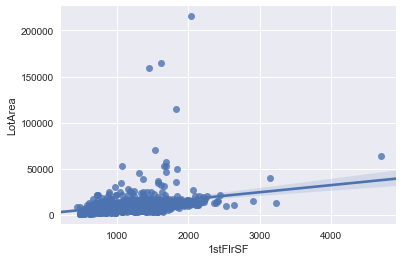

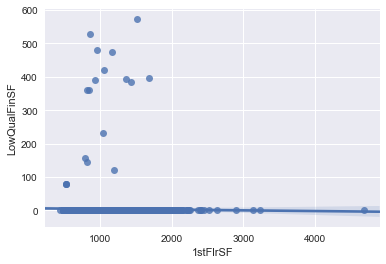

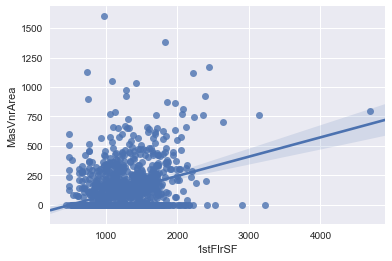

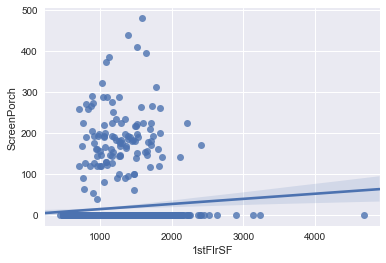

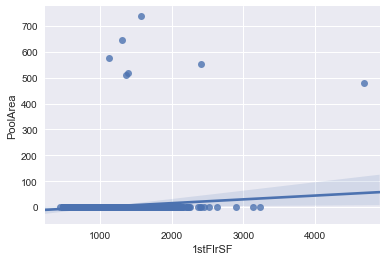

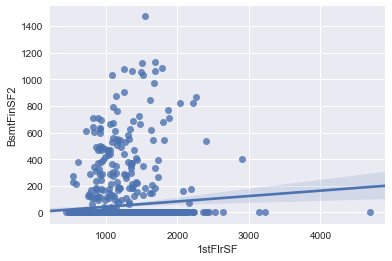

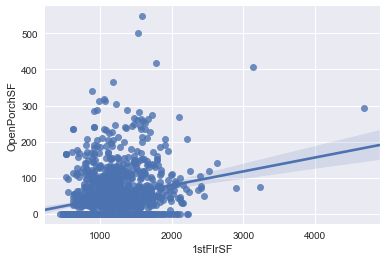

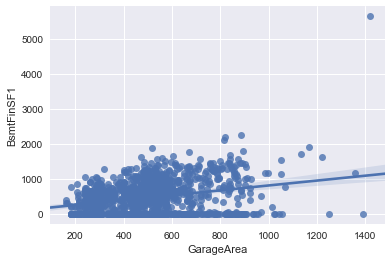

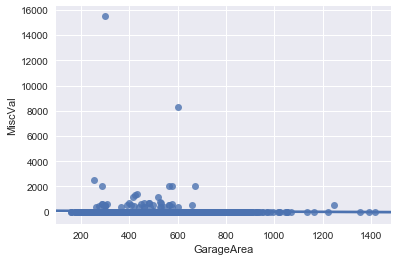

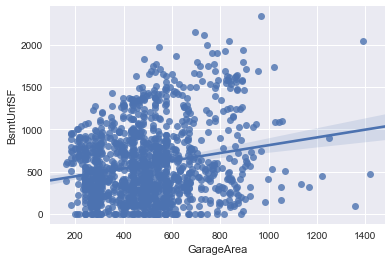

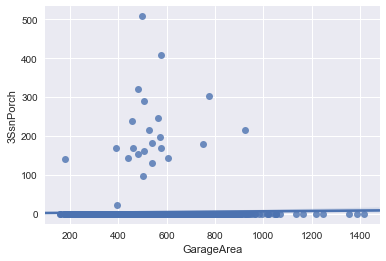

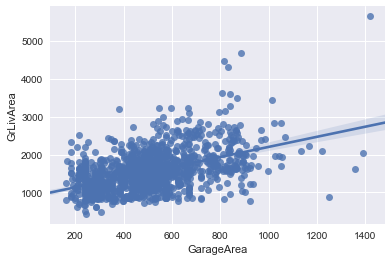

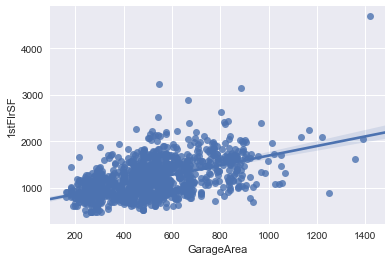

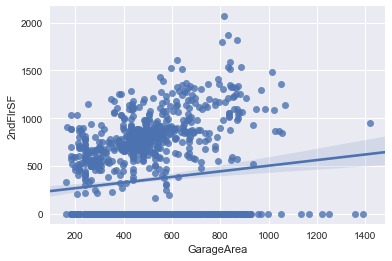

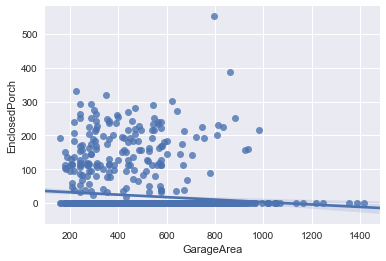

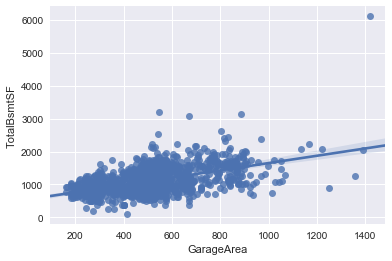

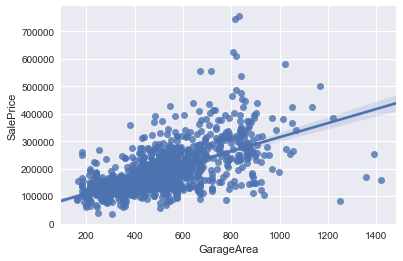

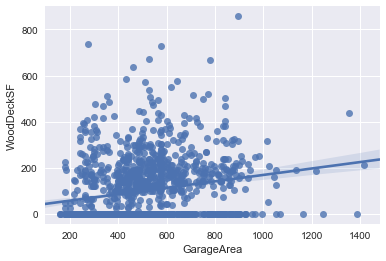

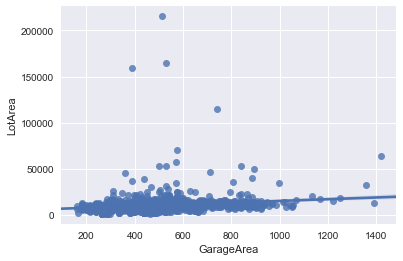

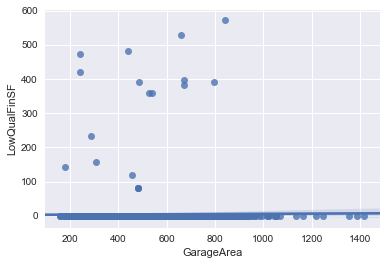

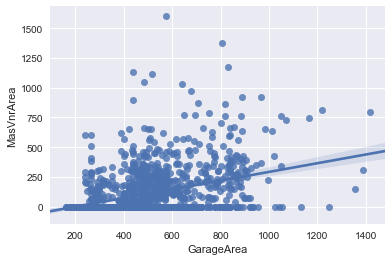

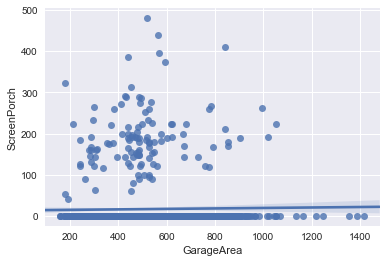

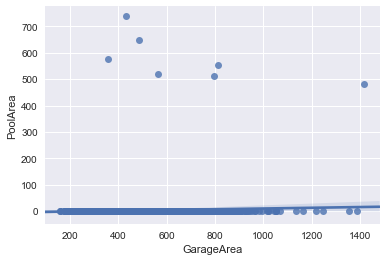

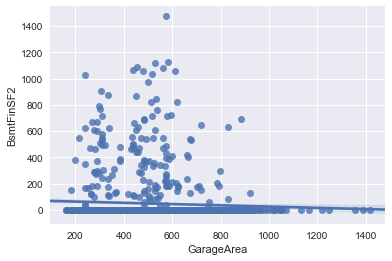

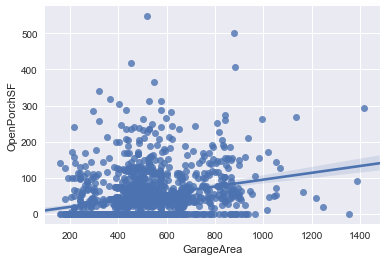

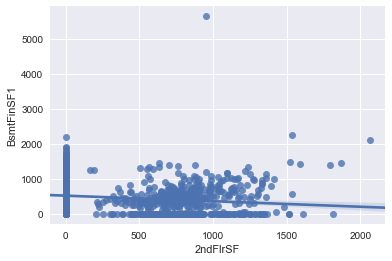

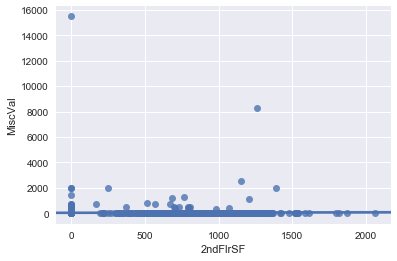

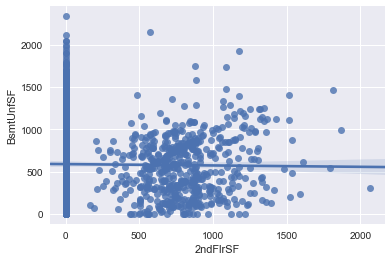

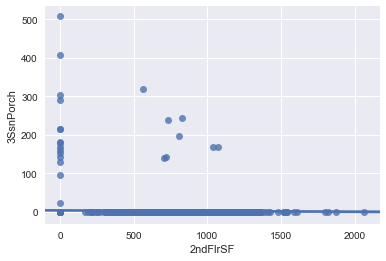

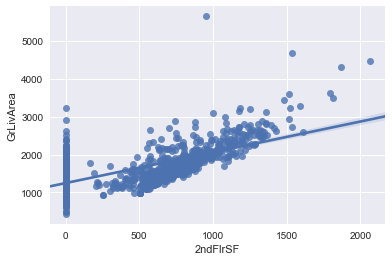

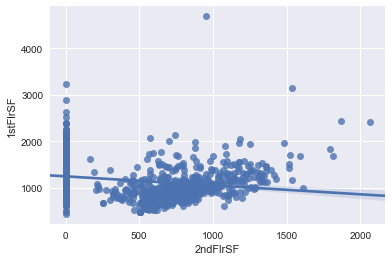

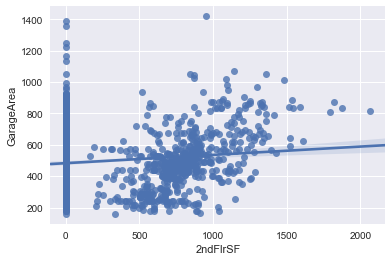

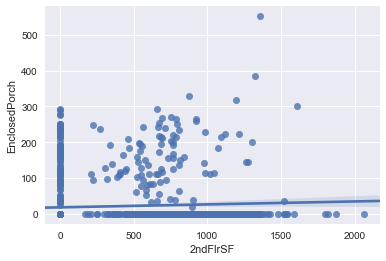

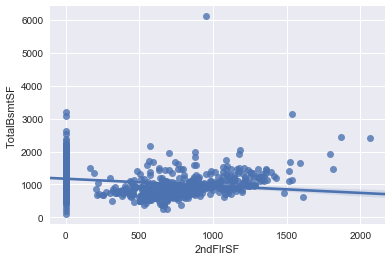

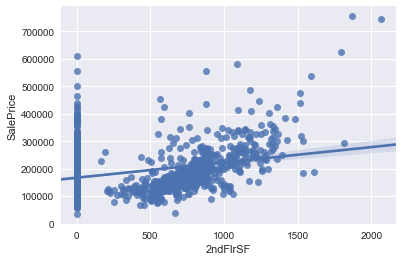

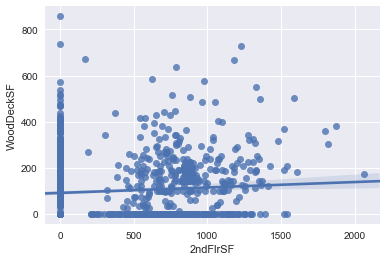

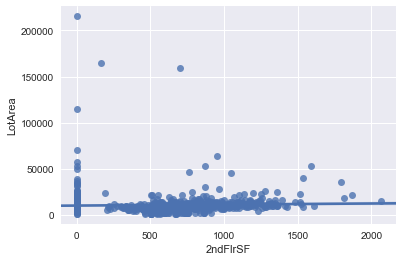

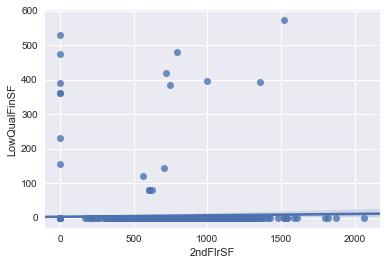

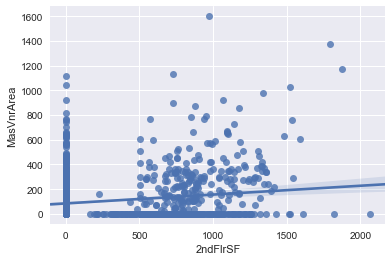

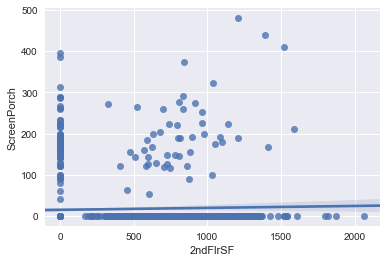

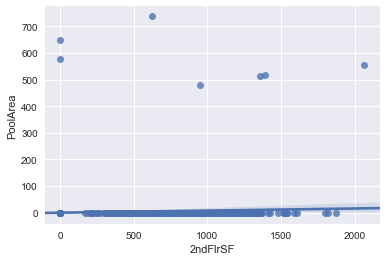

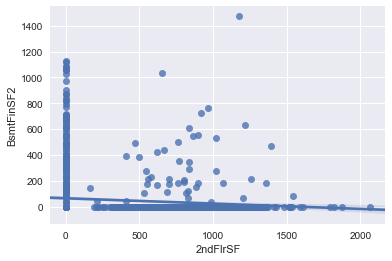

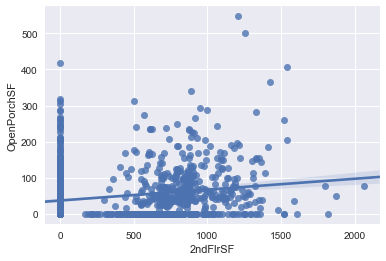

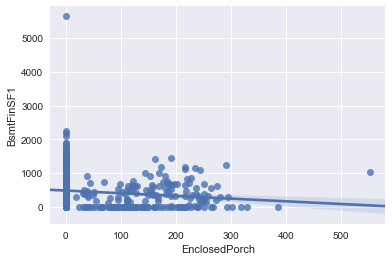

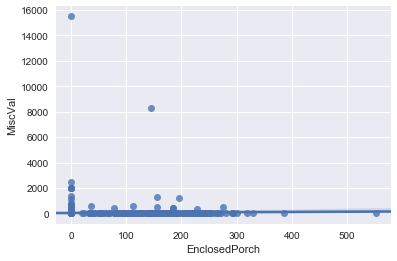

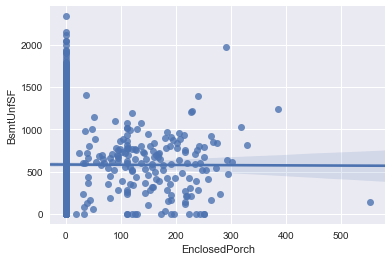

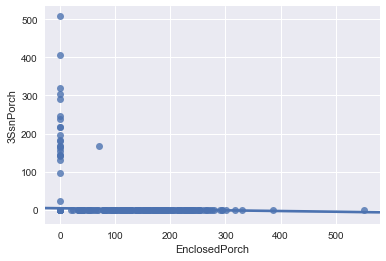

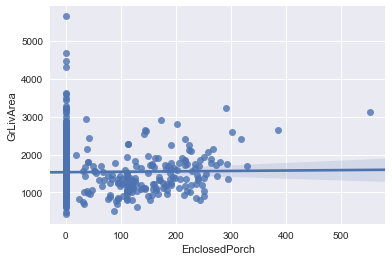

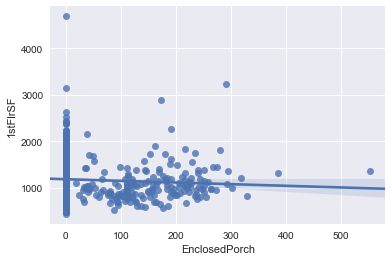

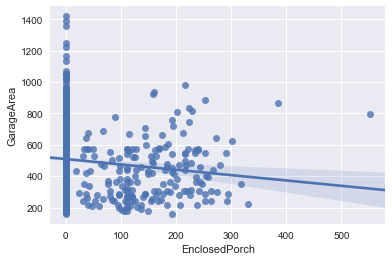

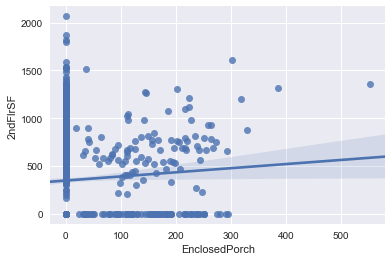

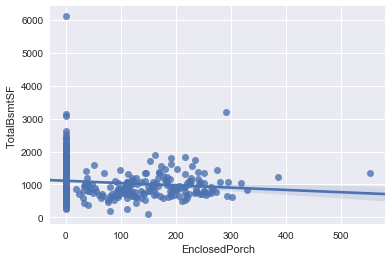

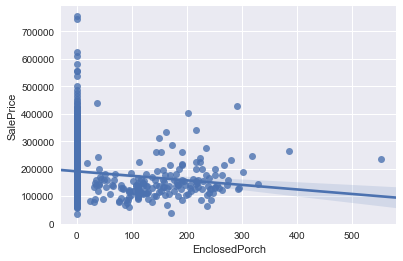

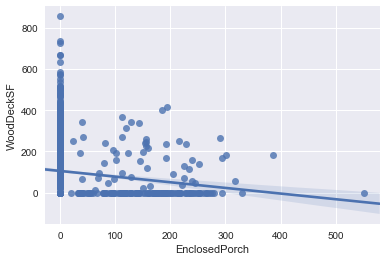

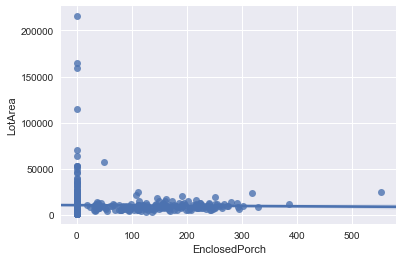

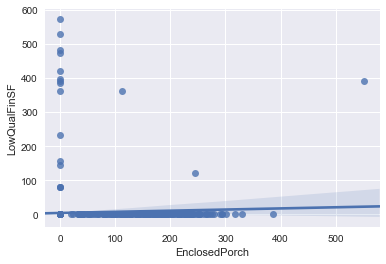

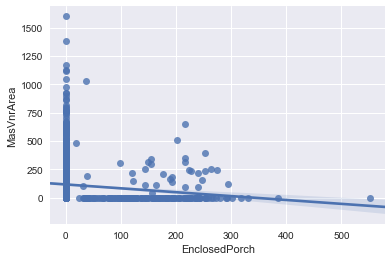

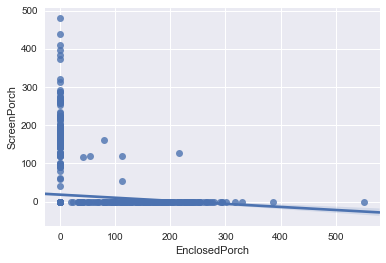

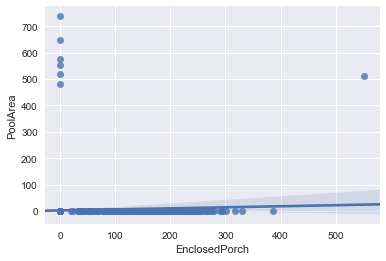

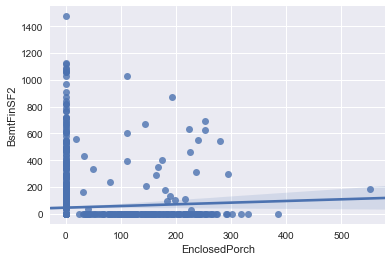

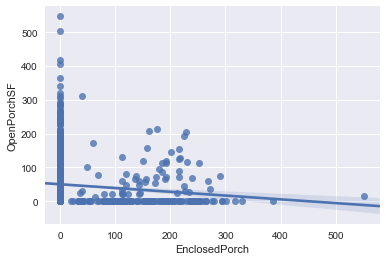

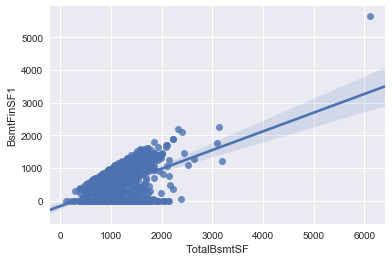

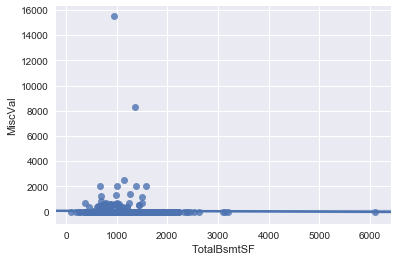

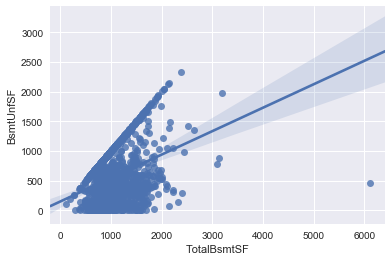

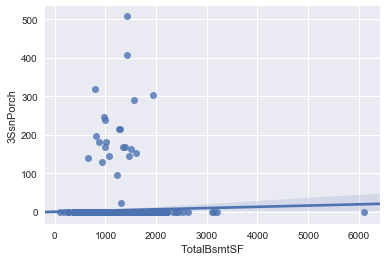

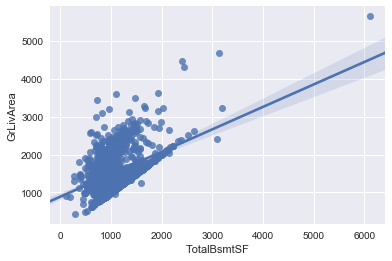

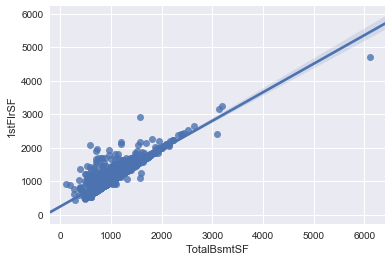

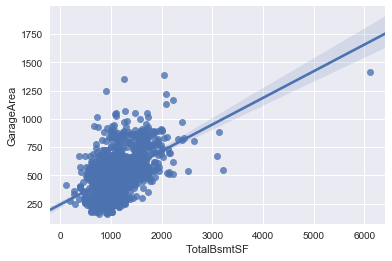

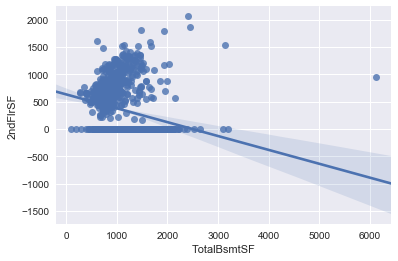

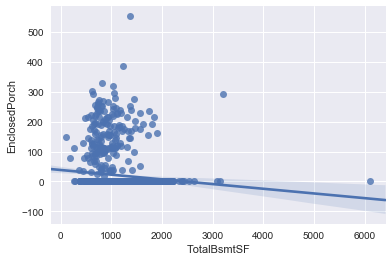

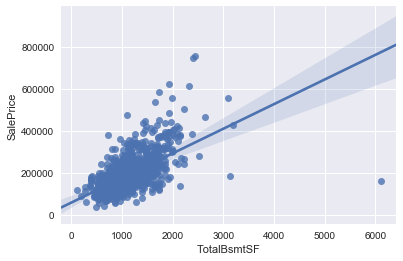

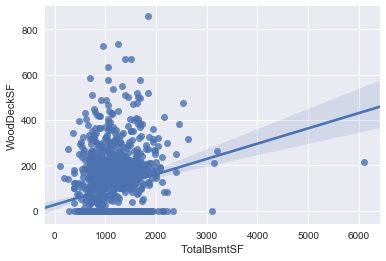

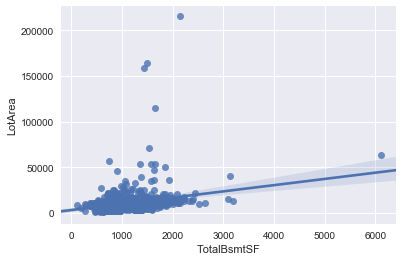

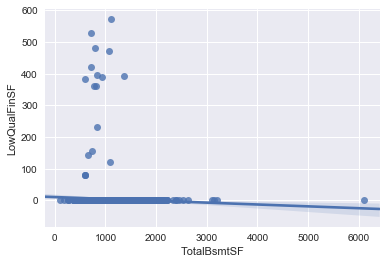

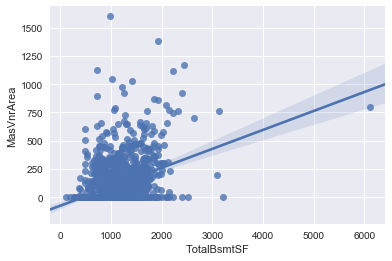

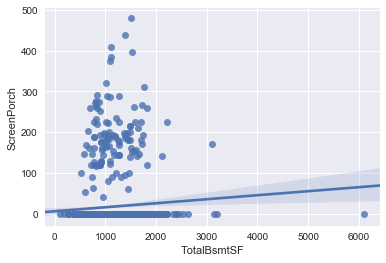

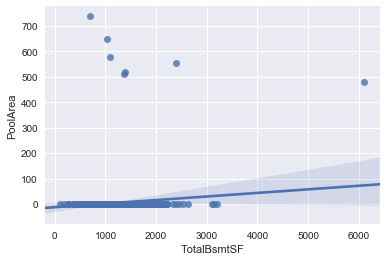

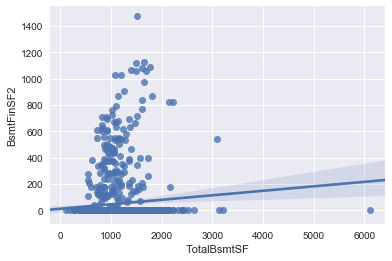

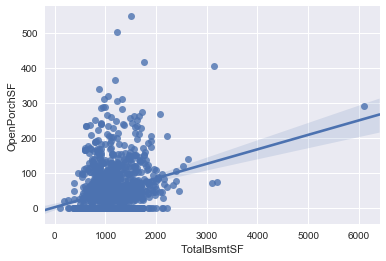

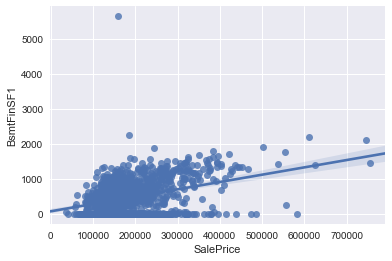

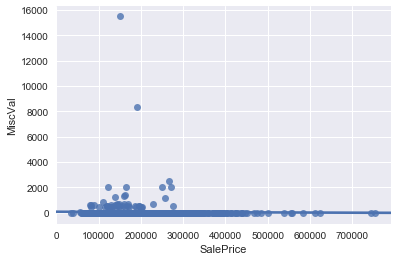

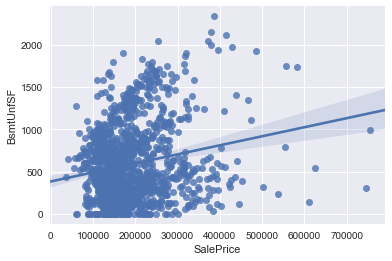

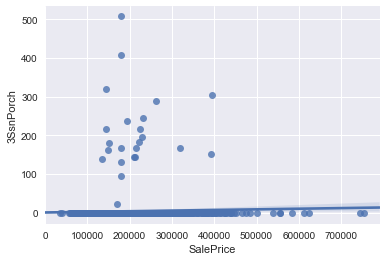

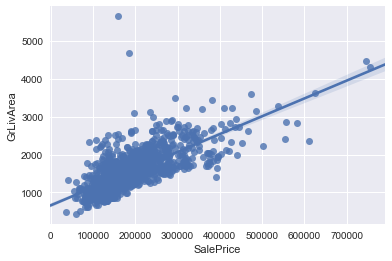

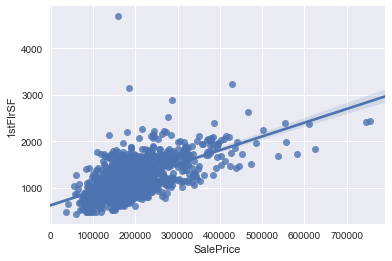

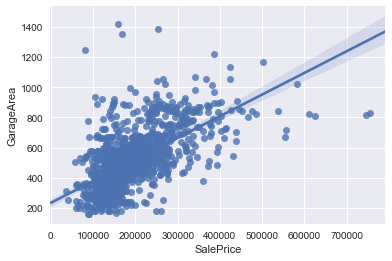

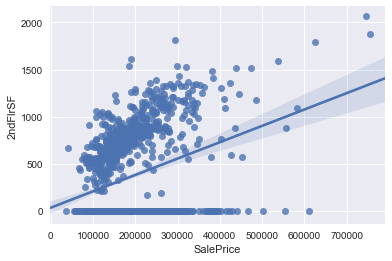

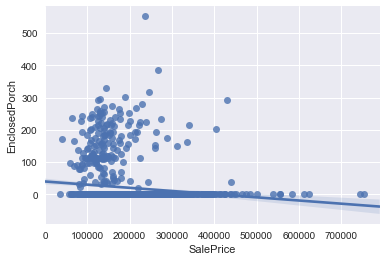

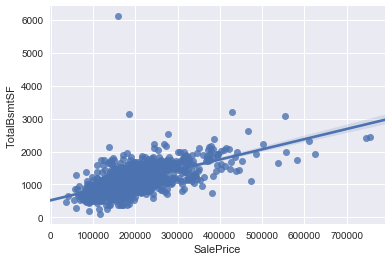

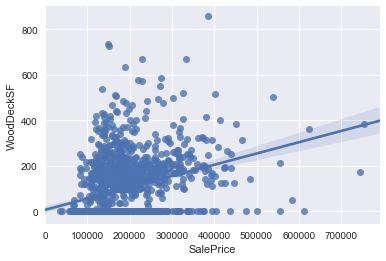

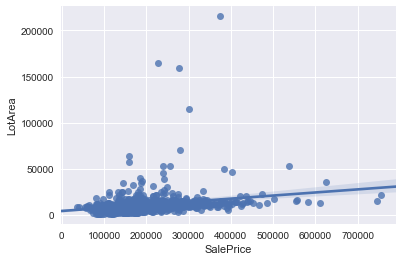

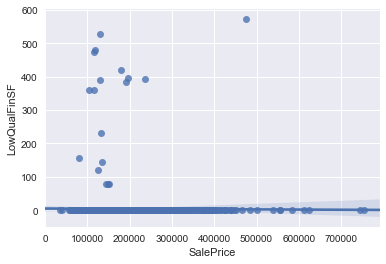

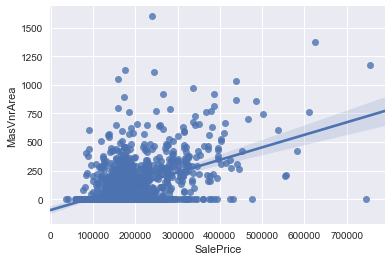

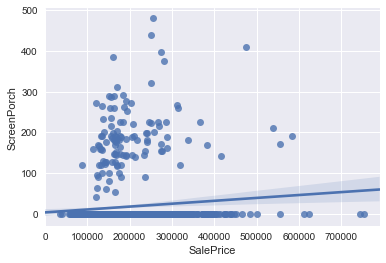

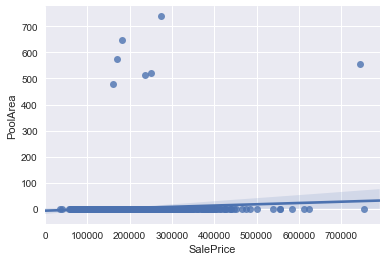

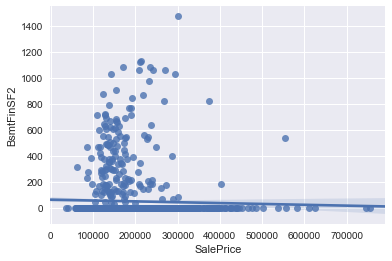

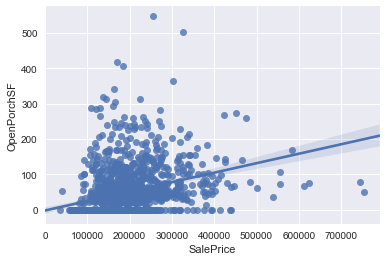

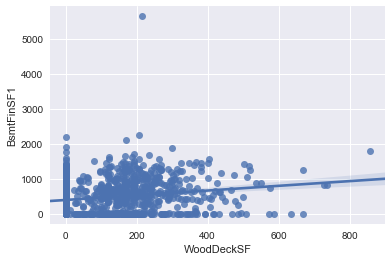

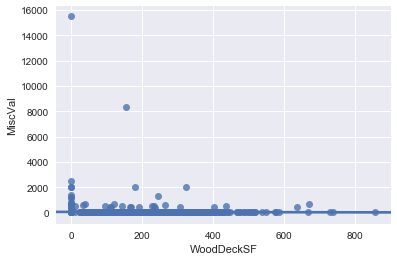

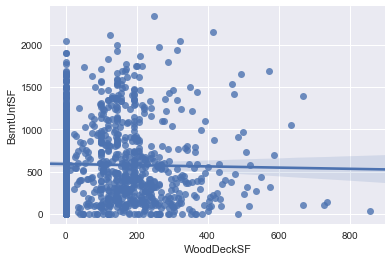

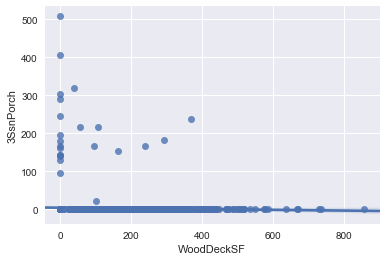

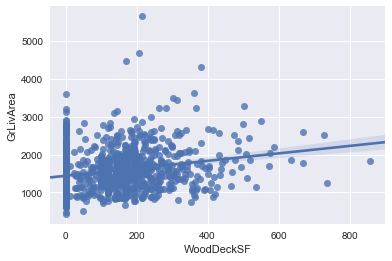

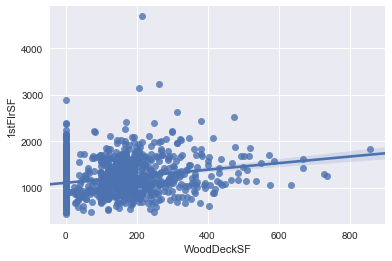

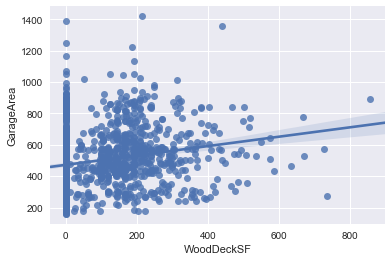

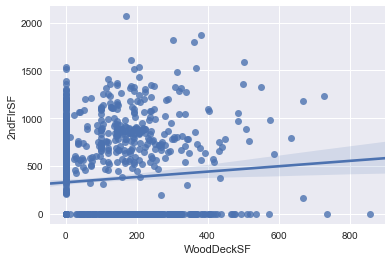

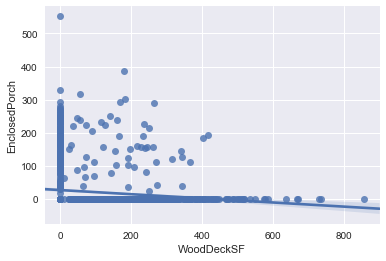

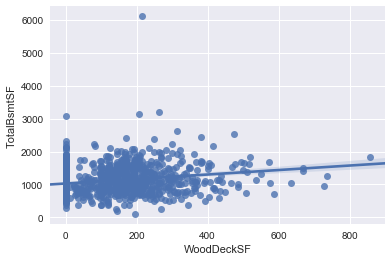

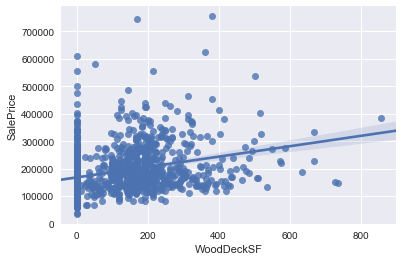

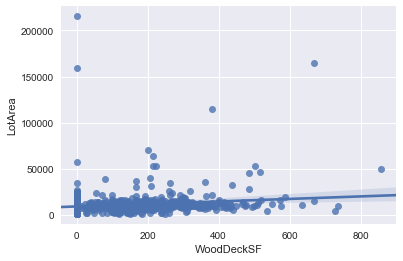

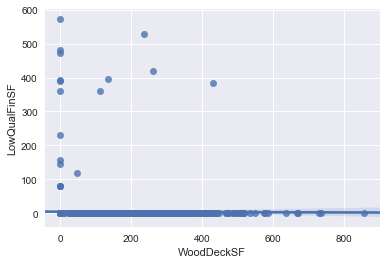

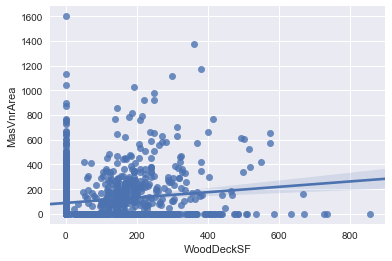

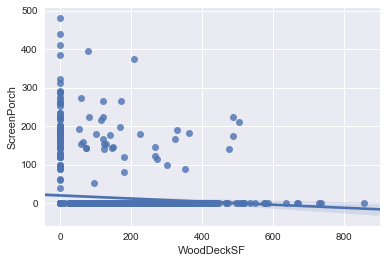

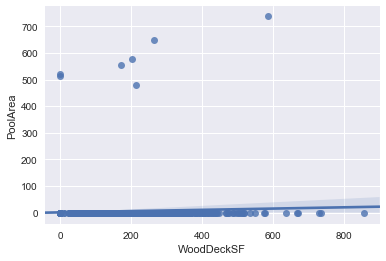

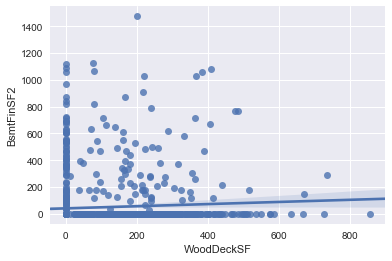

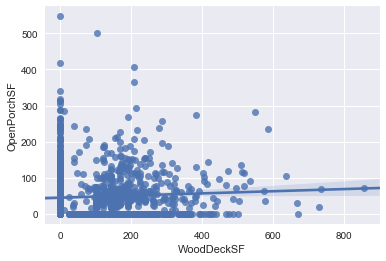

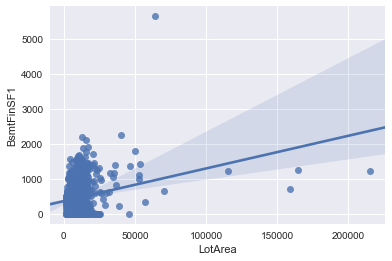

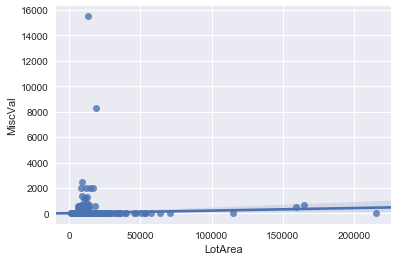

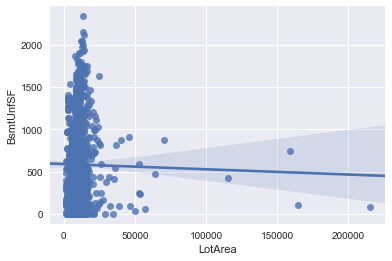

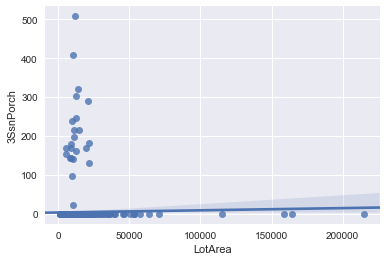

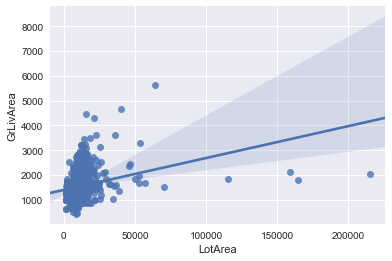

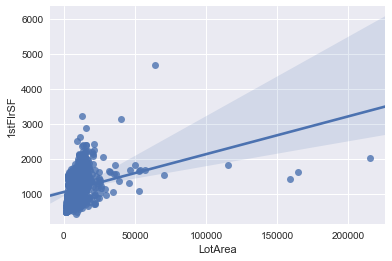

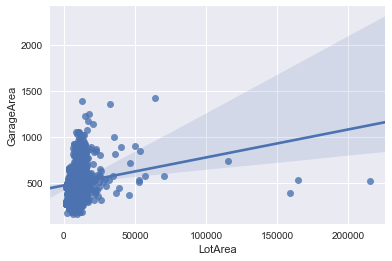

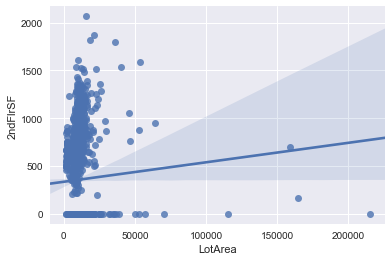

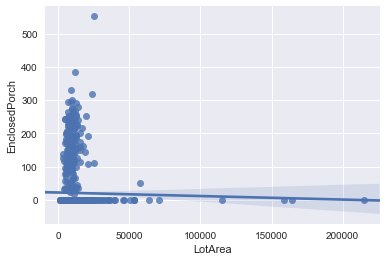

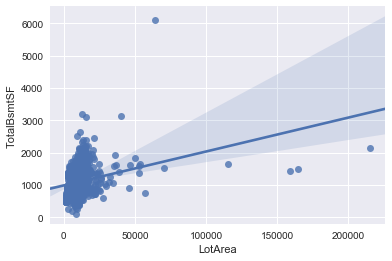

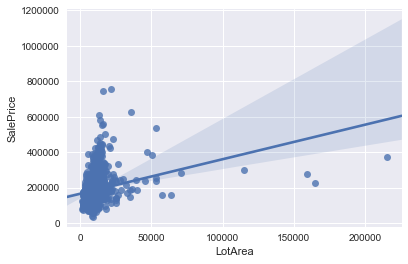

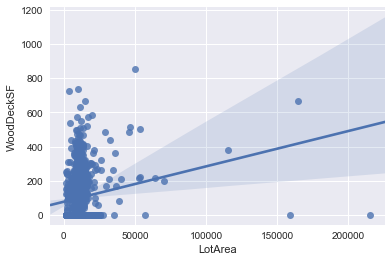

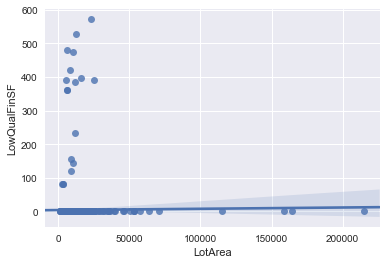

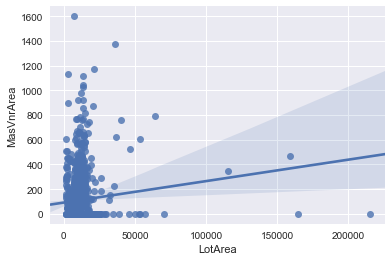

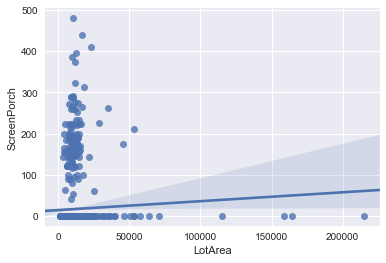

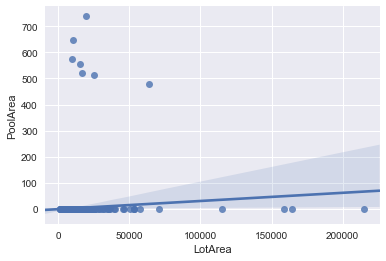

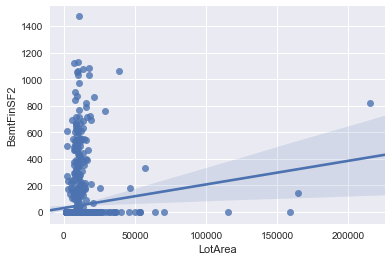

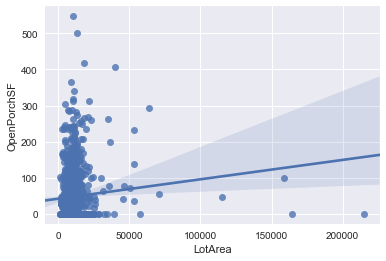

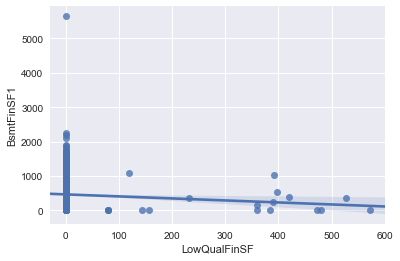

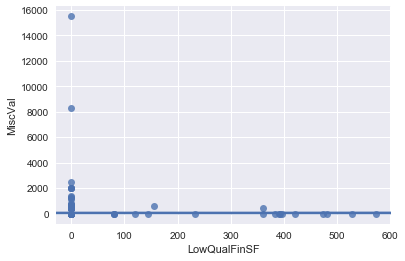

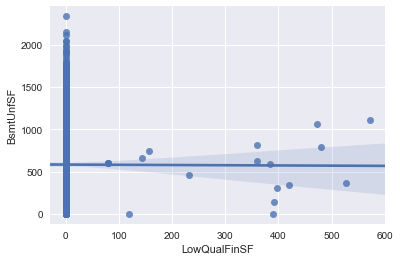

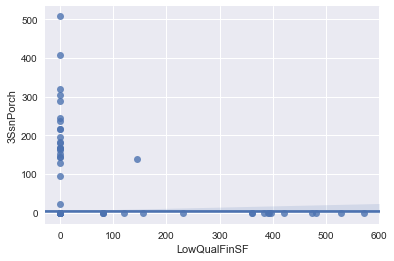

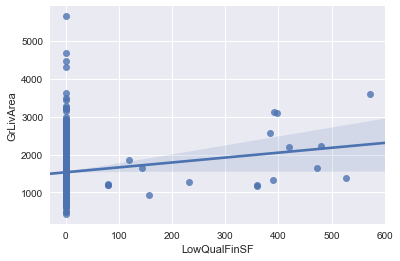

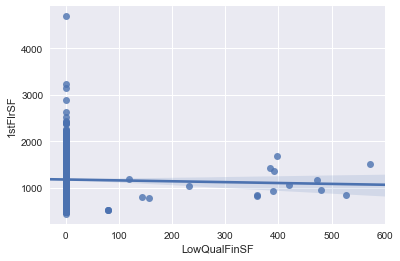

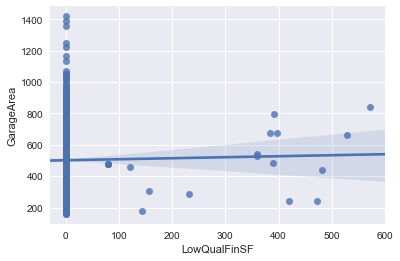

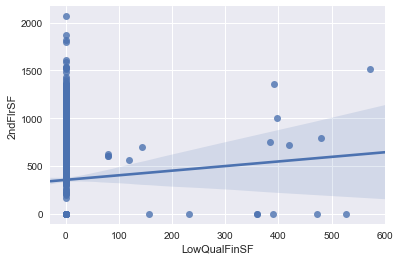

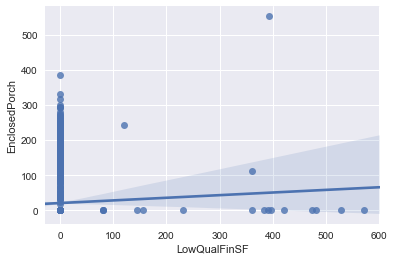

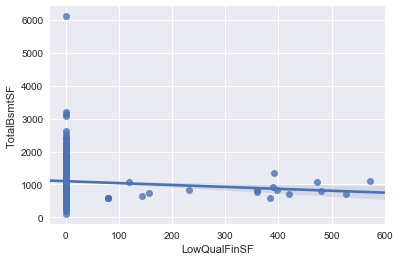

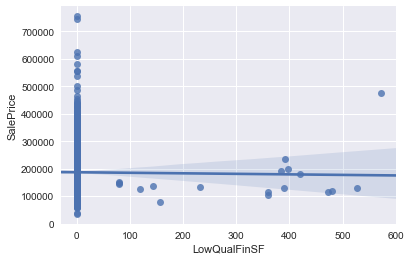

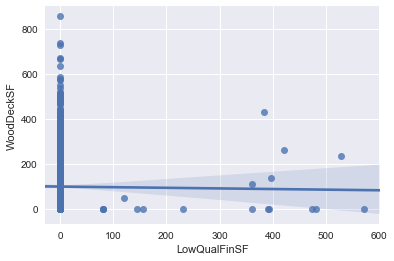

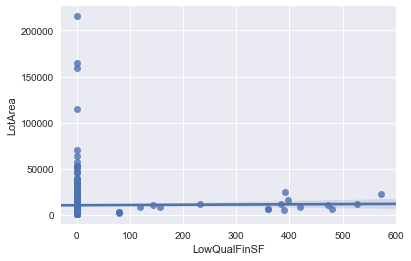

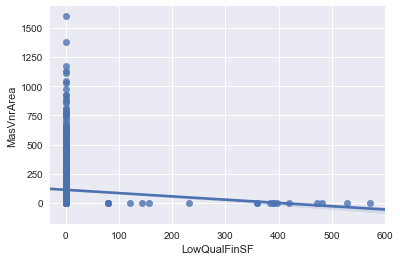

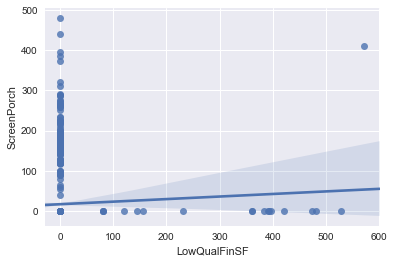

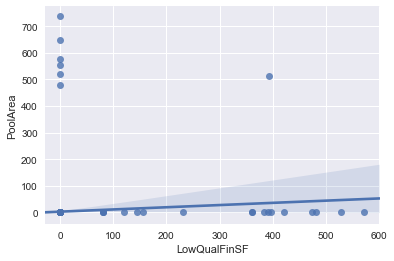

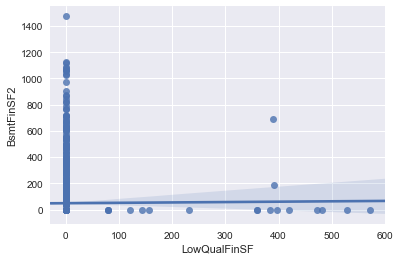

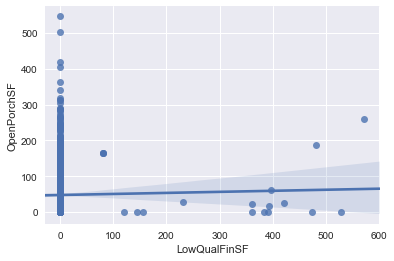

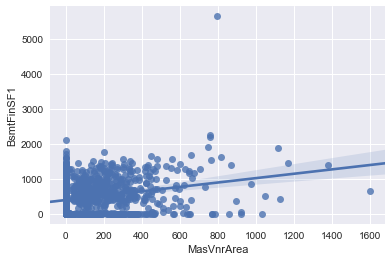

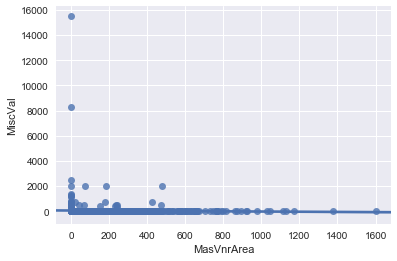

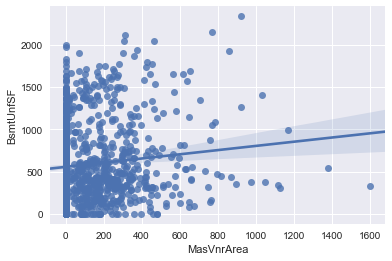

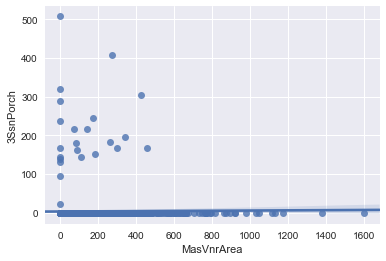

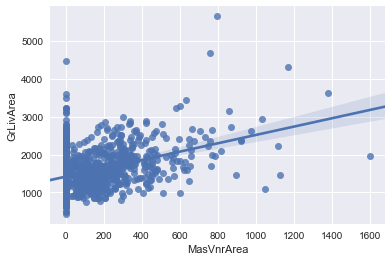

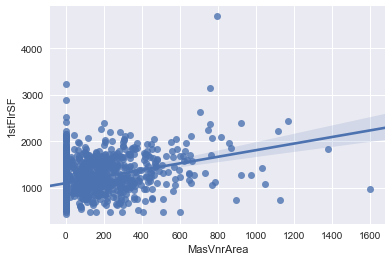

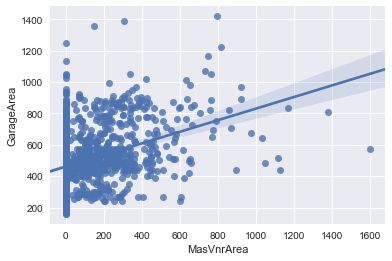

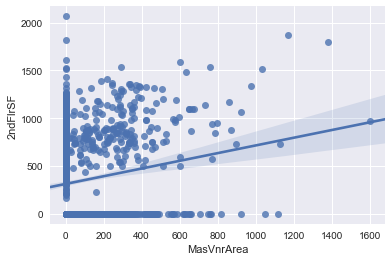

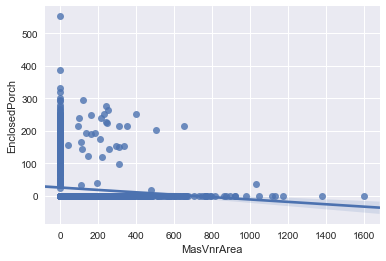

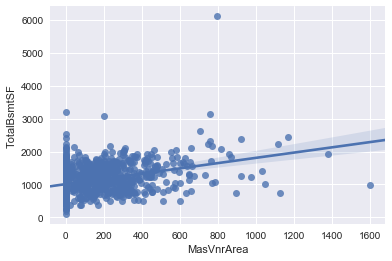

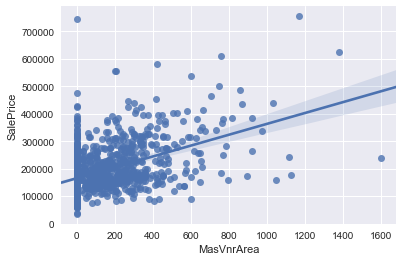

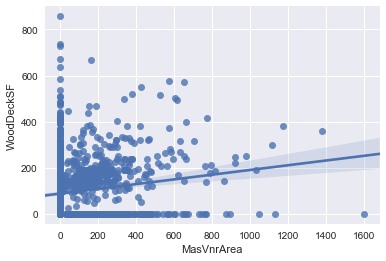

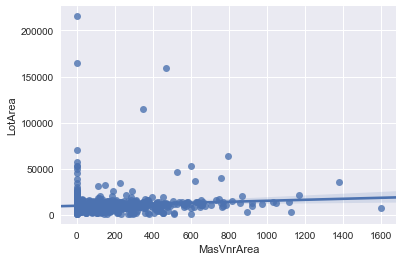

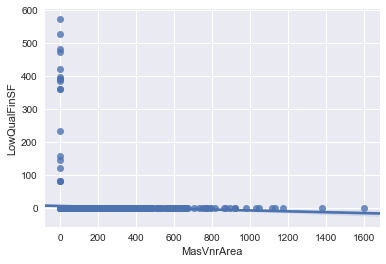

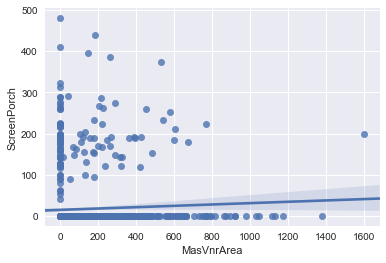

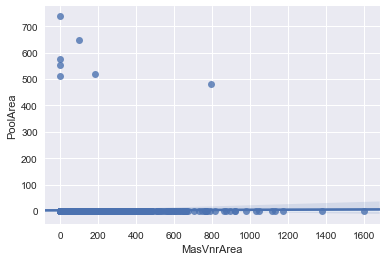

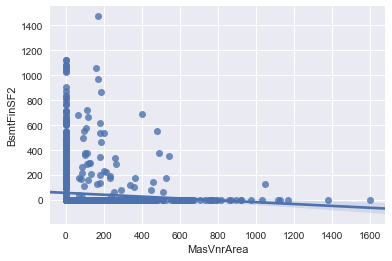

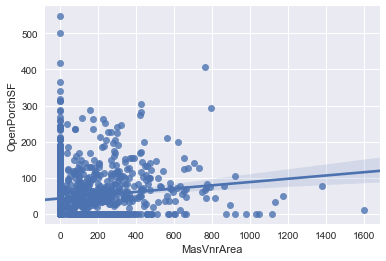

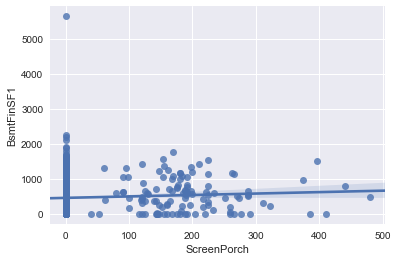

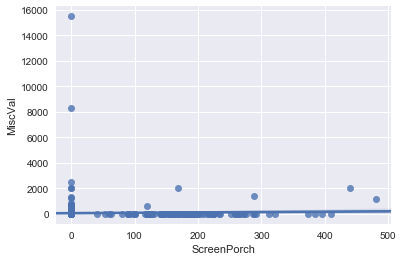

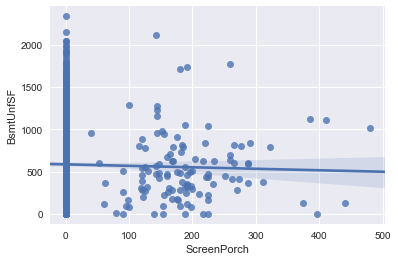

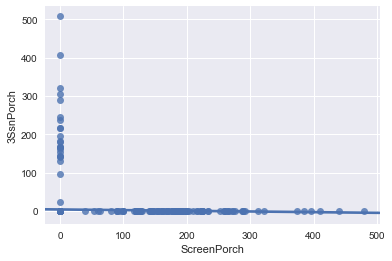

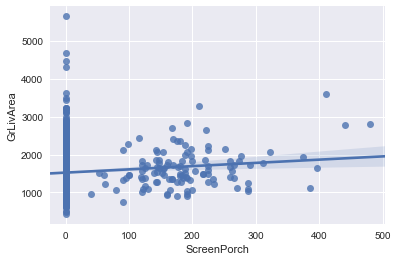

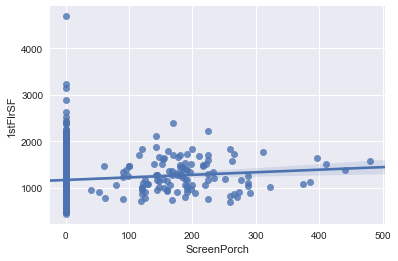

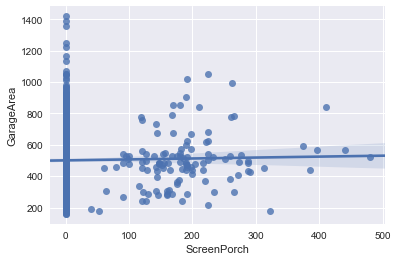

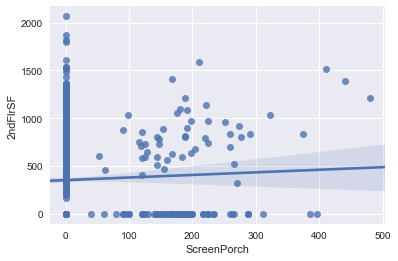

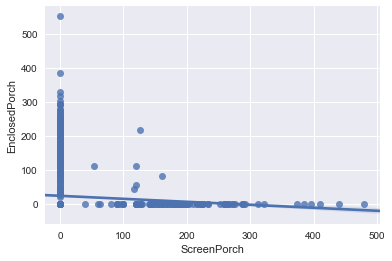

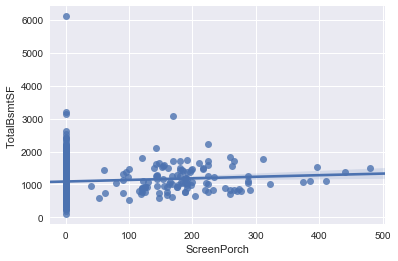

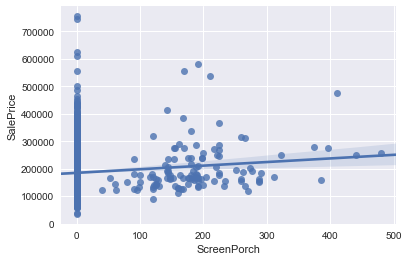

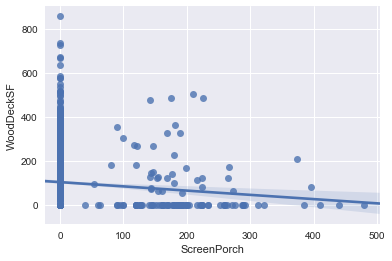

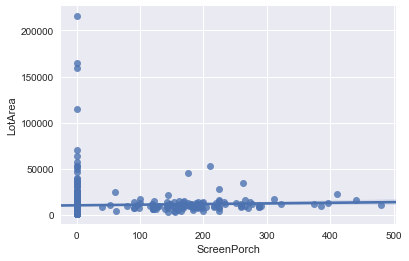

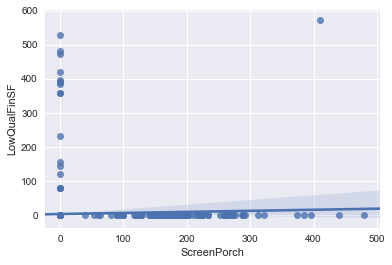

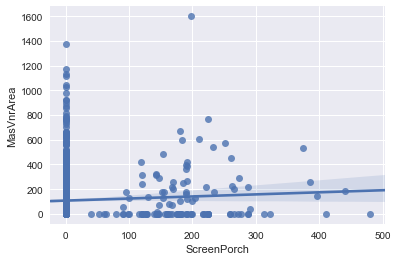

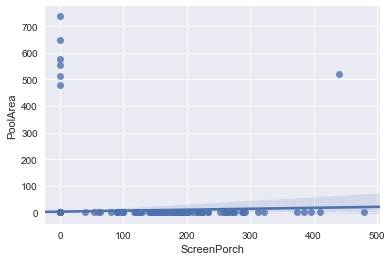

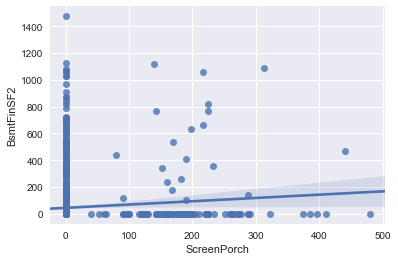

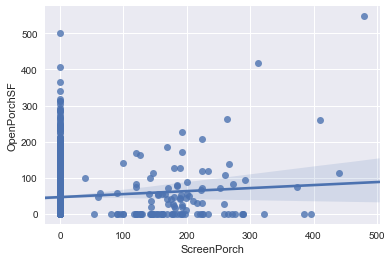

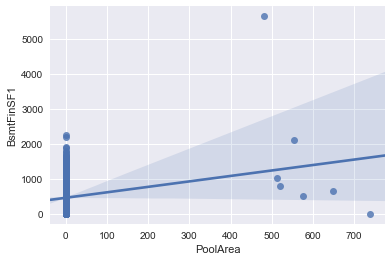

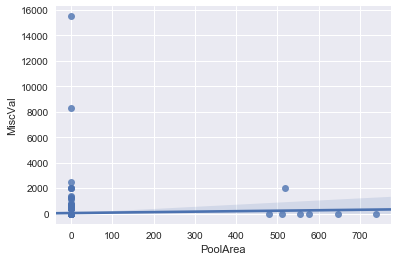

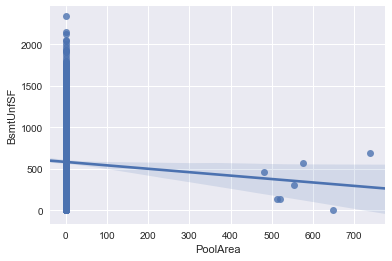

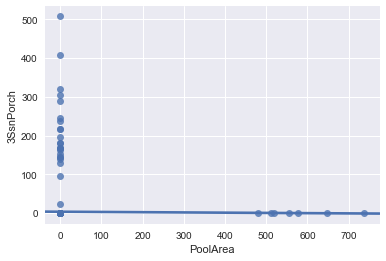

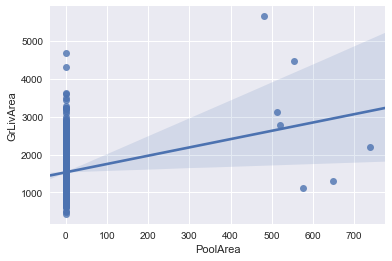

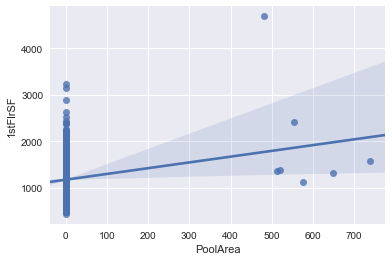

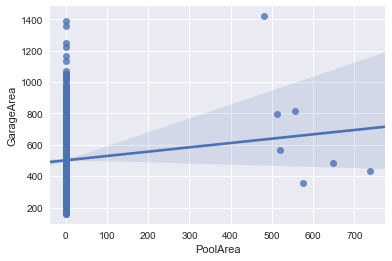

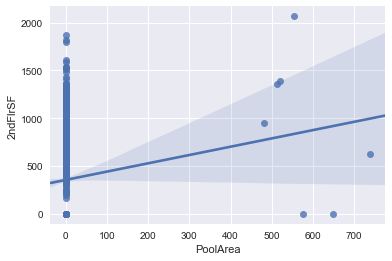

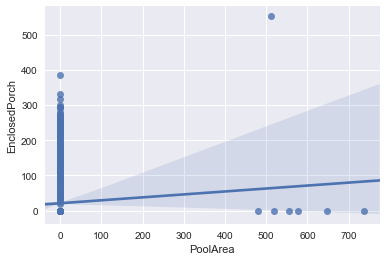

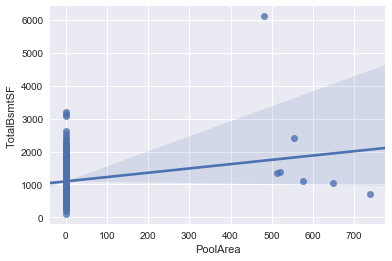

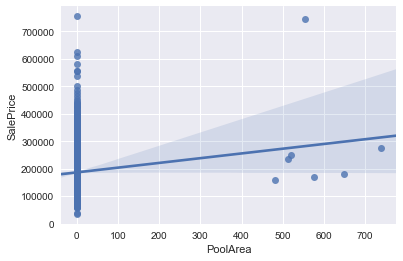

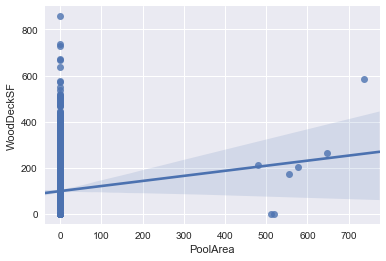

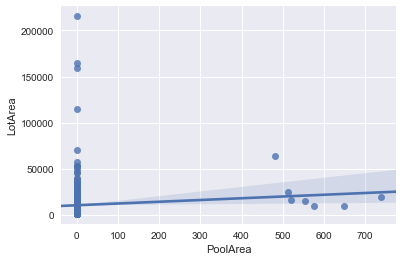

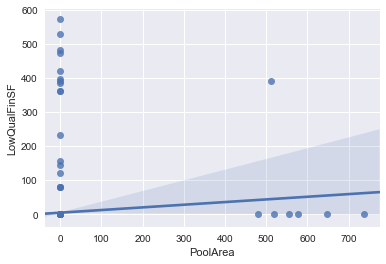

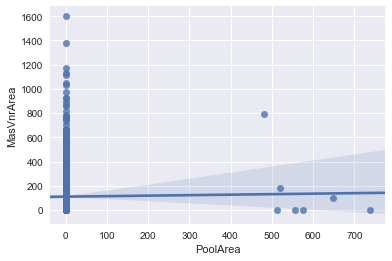

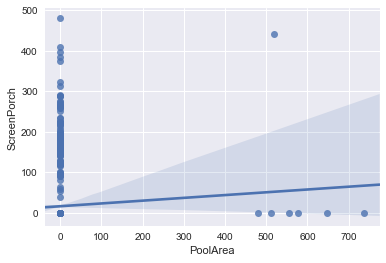

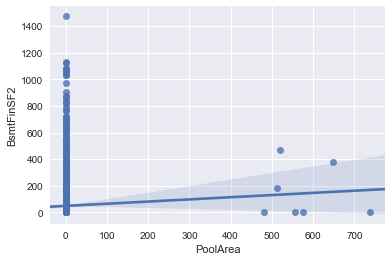

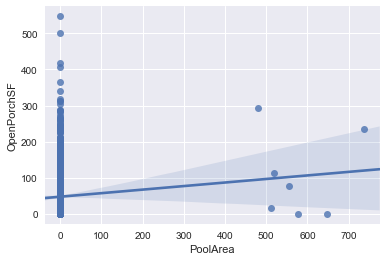

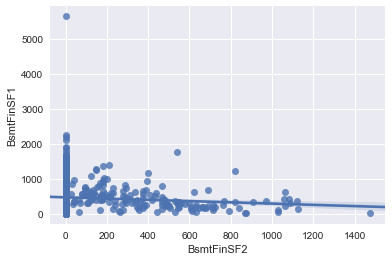

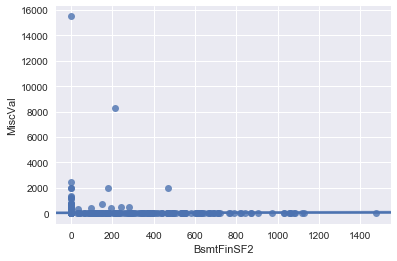

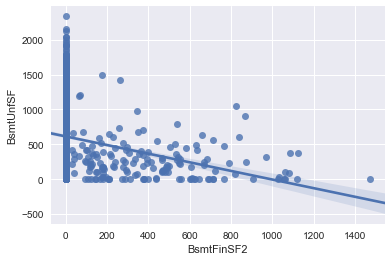

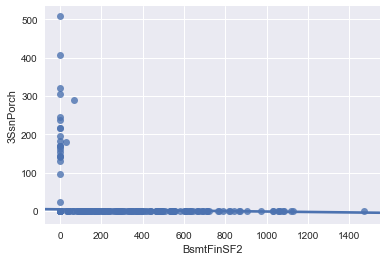

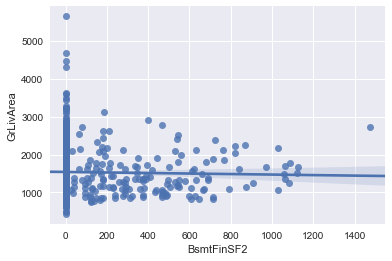

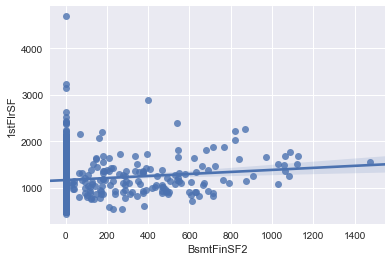

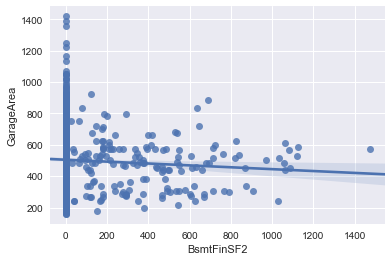

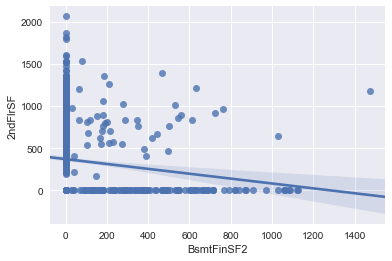

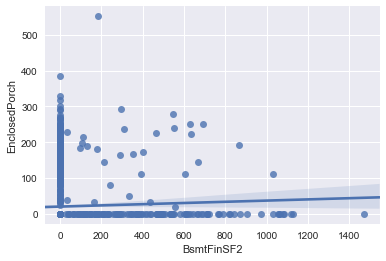

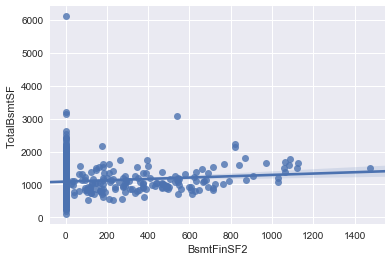

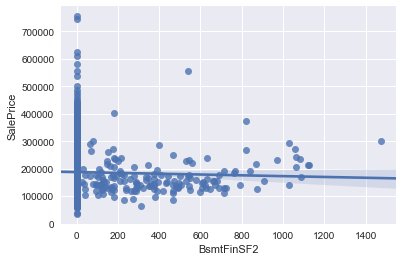

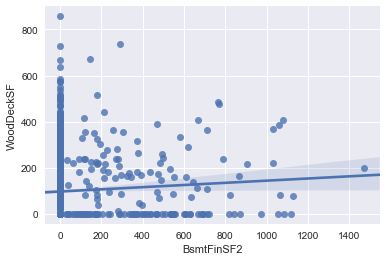

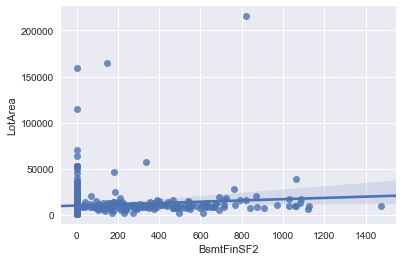

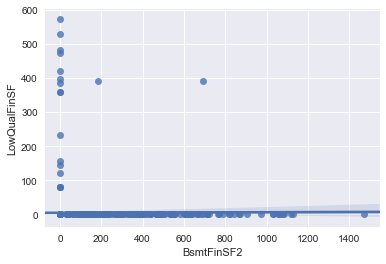

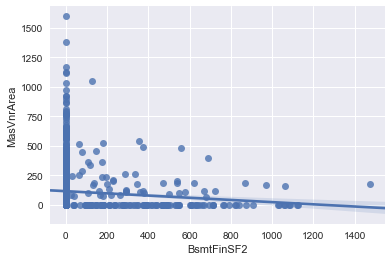

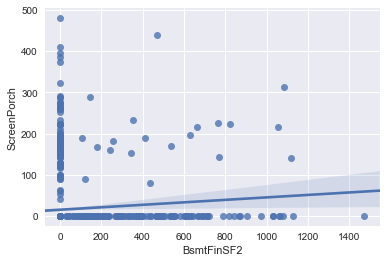

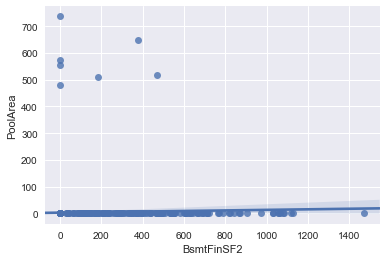

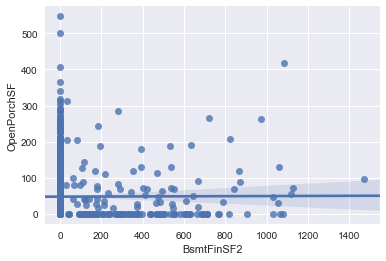

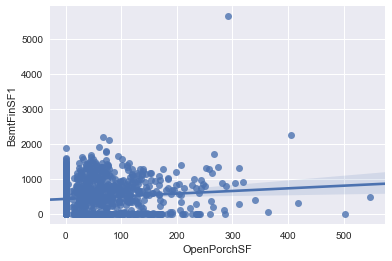

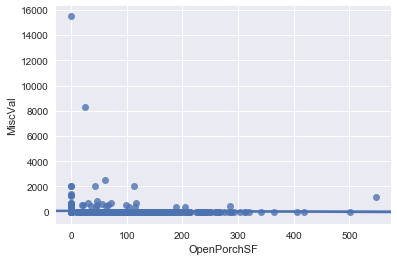

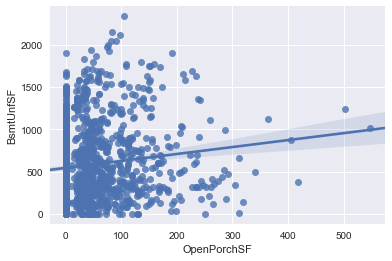

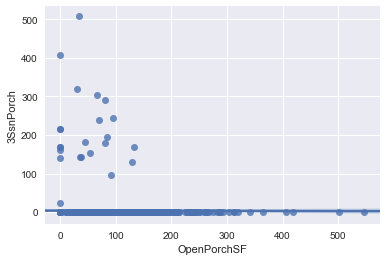

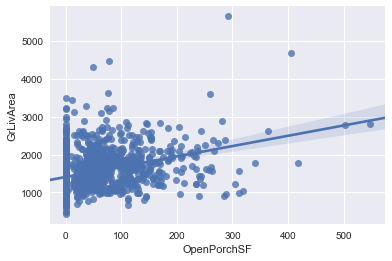

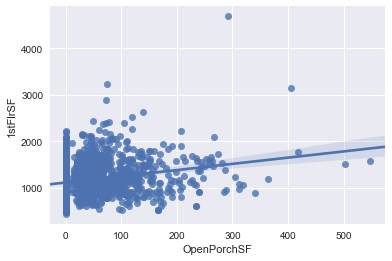

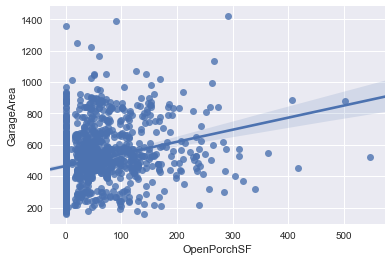

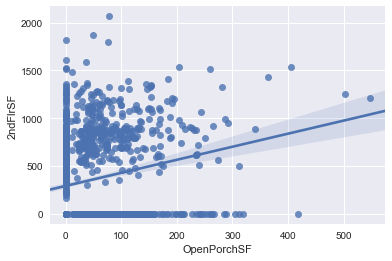

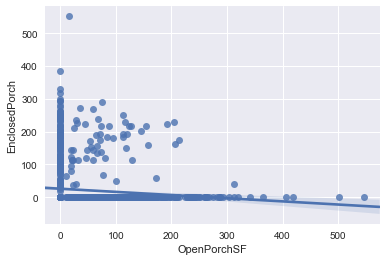

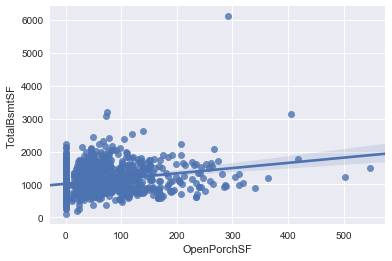

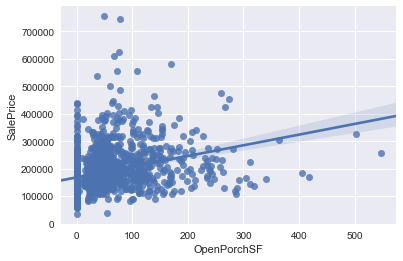

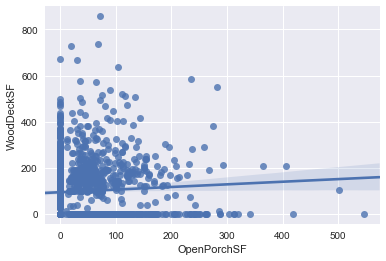

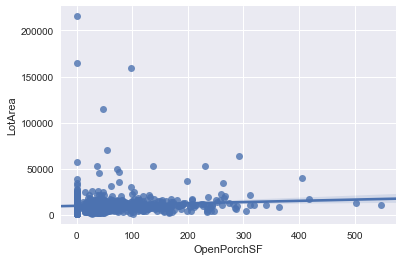

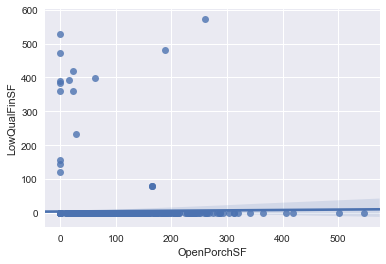

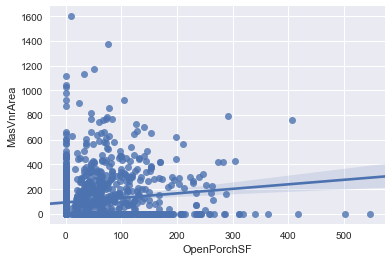

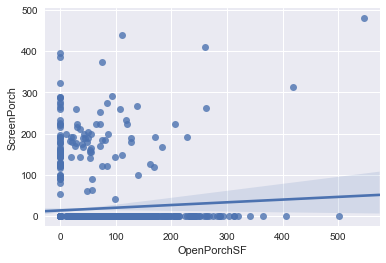

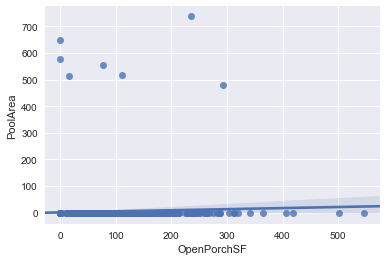

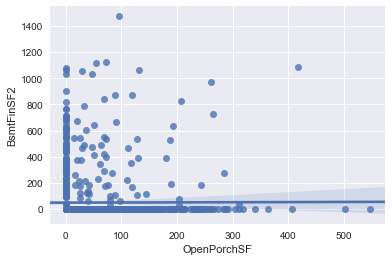

In [33]:
for colx in contCols:
    for coly in contCols:
        if colx != coly:
            ax = sns.regplot(x=colx,y=coly, data=df_dropped)
            plt.show()

In [34]:
# trimp outliers
#df_trim = pd.DataFrame()
#df_trim = df_dropped.copy(deep=True)
#for col in contCols:
#    df_trim = df_trim[df_trim[col] < df_trim[col].quantile(.99)] 

In [35]:
df_allDumm = pd.DataFrame()
df_allNoTxt = pd.DataFrame()

noTxtCols = list(set(df_dropped.columns) - set(catTxtCols))

df_allDumm = pd.get_dummies(df_dropped[catTxtCols])

df_allNoTxt = pd.concat([df_dropped[noTxtCols], df_allDumm], axis=1)

In [36]:
df_allNoTxt.head()

MiscVal  YearBuilt  YrSold  3SsnPorch  OverallQual  Fireplaces  OverallCond  2ndFlrSF  MSSubClass  TotalBsmtSF  WoodDeckSF  FullBath  MasVnrArea  BsmtFullBath  KitchenAbvGr  OpenPorchSF  1stFlrSF  BsmtFinSF1  BsmtUnfSF  GarageCars  BsmtHalfBath  BedroomAbvGr  HalfBath  GrLivArea  MoSold  GarageYrBlt  GarageArea  YearRemodAdd  TotRmsAbvGrd  EnclosedPorch  LotArea  LowQualFinSF  ScreenPorch  PoolArea  BsmtFinSF2  SalePrice  HeatingQC_Ex  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  CentralAir_N  CentralAir_Y  Utilities_AllPub  Utilities_NoSeWa  Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0        0       2003    2008          0            7           0            5       854          60          856           0         2       196.0             1             1           61       856         706        150           2             0             3         1       1710       2       2003.0         548          2003             8              0     8450             0            0         0           0     208500             1             0             0             0             0             1             0             0             0             0             1                 1                 0                     0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0   
1        0       1976    2007          0            6           1            8         0          20         1262         298         2         0.0             0             1            0      1262         978        284           2             1             3         0       1262       5       1976.0         460          1976             6              0     9600             0            0         0           0     181500             1             0             0             0             0             1             0             0             0             0             1                 1                 0                     0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0   
2        0       2001    2008          0            7           1            5       866          60          920           0         2       162.0             1             1           42       920         486        434           2             0             3         1       1786       9       2001.0         608          2002             6              0    11250             0            0         0           0     223500             1             0             0             0             0             1             0             0             0             0             1                 1                 0                     0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0   
3        0       1915    2006          0   

In [37]:
allFeats = [a for a in df_allNoTxt.columns if a not in ['SalePrice']]
contFeats = [a for a in df_allNoTxt[contCols].columns if a not in ['SalePrice']]

X=df_allNoTxt[allFeats]
Y=df_allNoTxt['SalePrice']
X.head()

MiscVal  YearBuilt  YrSold  3SsnPorch  OverallQual  Fireplaces  OverallCond  2ndFlrSF  MSSubClass  TotalBsmtSF  WoodDeckSF  FullBath  MasVnrArea  BsmtFullBath  KitchenAbvGr  OpenPorchSF  1stFlrSF  BsmtFinSF1  BsmtUnfSF  GarageCars  BsmtHalfBath  BedroomAbvGr  HalfBath  GrLivArea  MoSold  GarageYrBlt  GarageArea  YearRemodAdd  TotRmsAbvGrd  EnclosedPorch  LotArea  LowQualFinSF  ScreenPorch  PoolArea  BsmtFinSF2  HeatingQC_Ex  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  CentralAir_N  CentralAir_Y  Utilities_AllPub  Utilities_NoSeWa  Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0        0       2003    2008          0            7           0            5       854          60          856           0         2       196.0             1             1           61       856         706        150           2             0             3         1       1710       2       2003.0         548          2003             8              0     8450             0            0         0           0             1             0             0             0             0             1             0             0             0             0             1                 1                 0                     0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
1        0       1976    2007          0            6           1            8         0          20         1262         298         2         0.0             0             1            0      1262         978        284           2             1             3         0       1262       5       1976.0         460          1976             6              0     9600             0            0         0           0             1             0             0             0             0             1             0             0             0             0             1                 1                 0                     0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
2        0       2001    2008          0            7           1            5       866          60          920           0         2       162.0             1             1           42       920         486        434           2             0             3         1       1786       9       2001.0         608          2002             6              0    11250             0            0         0           0             1             0             0             0             0             1             0             0             0             0             1                 1                 0                     0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   

In [38]:
#help(ensemble.DecisionTreeClassifier)

In [39]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.feature_selection import RFE
from sklearn import linear_model
import copy


class ModelCat():
    def performance(self):
        print()
       
class ModelCont():
    def initValues(self):
        self.modObjFit = self.modelObj.fit(self.X, self.Y)
        self.rSquared = self.modelObj.score(self.X, self.Y)
        self.crossVal = cross_val_score(self.modelObj, self.X, self.Y, cv=10)
        
    
    def performance(self, boxPlot=True):
        print ("Model: " + self.name)
        print ("r-squared:" + str(self.rSquared))
        print ("Cross Validation Scores: ")
        print (self.crossVal)
        if boxPlot:
            fig = plt.figure()
            title = "Performance: %s" % (self.name)
            fig.suptitle(title)
            ax = fig.add_subplot(111)
            plt.boxplot(self.crossVal)
            ax.set_xticklabels(self.name)
            plt.show()
    
    def compareFolds(self, modelRight):
        fmt = '{:<2}{:<20}|{:<10}'
        a_left = self.crossVal
        a_right = modelRight.crossVal
        a_left.sort()
        a_right.sort()
        
        print("CROSS VALIDATION SCORES")
        print(fmt.format('',self.name,modelRight.name))
        for i, (left, right) in enumerate(zip(a_left, a_right)):
            print(fmt.format(i, left, right))
            
    def compareR(self,modelRight):
        fmt = '{:<2}{:<20}|{:<20}'
        
        print("R-SQUARED")
        print(fmt.format('',self.name,modelRight.name))
        print(fmt.format('',self.rSquared,modelRight.rSquared))
        
    def compareBox(self,modelList,filter=0, newTitle=''):
        results = []
        names = []
        
        results.append(self.crossVal)
        names.append(self.name)
        
        for rightModel in modelList:
            if filter > 0:
                if rightModel.crossVal.mean() > filter:
                    results.append(rightModel.crossVal)
                    names.append(rightModel.name)
            else:
                results.append(rightModel.crossVal)
                names.append(rightModel.name)
        
        fig = plt.figure()
        if newTitle != '':
            title = newTitle
        else:
            title = "Performance: %s" % (self.name)
        fig.suptitle(title)
        ax = fig.add_subplot(111)
        
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.setp(ax.get_xticklabels(), rotation=90)
        plt.show()

    def fullCompare(self,modelRight):
        self.compareR(modelRight)
        self.compareFolds(modelRight)
        modelList = []
        modelList.append(modelRight)
        self.compareBox(modelList)

class LassoRegModel(ModelCont): 
    def __init__(self,name,xNames,yName,alpha,trainData):
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.alpha = alpha
        self.modelObj = linear_model.Lasso(alpha=alpha)
        super().initValues()

class RidgeRegModel(ModelCont): 
    def __init__(self,name,xNames,yName,alpha,trainData):
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.alpha = alpha
        self.modelObj = linear_model.Ridge(alpha=alpha, fit_intercept=False)
        super().initValues()

class LogisticRegModel(ModelCat):
    def __init__(self,name,xNames,yName,regCoeff,trainData):
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.alpha = alpha
        self.modelObj = LogisticRegression(C=regCoeff)
        self.fitResult = self.modelObj.fit(self.X, self.Y)

    
class KNNModel(ModelCont):
    def __init__(self,name,xNames,yName,kVal,trainData, weighted=True):
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        self.weighted = weighted
        
        if self.weighted:
            self.modelObj = neighbors.KNeighborsRegressor(n_neighbors=kVal, weights='distance')
        else:
            self.modelObj = neighbors.KNeighborsRegressor(n_neighbors=kVal)
            
        self.modelObj.fit(self.X, self.Y)
        self.rSquared = self.modelObj.score(self.X, self.Y)
        self.crossVal = cross_val_score(self.modelObj, self.X, self.Y, cv=10)
       
    
        
class OLSModel(ModelCont):
    def __init__(self,name,xNames,yName,trainData):
        from sklearn.model_selection import cross_val_score
        self.name = name
        self.X = trainData[xNames]
        self.Y = trainData[yName]
        
        # sklearn
        self.regr = linear_model.LinearRegression()
        self.regr.fit(self.X,self.Y)
        self.rSquared = self.regr.score(self.X,self.Y)
        self.crossVal = cross_val_score(self.regr, self.X, self.Y, cv=10)
        
        #statsmodel
        self.lm = sm.OLS(self.Y, self.X).fit()
        self.params = self.lm.params
        self.pvalues = self.lm.pvalues
    
    def featureRanking(self):
        featSelector = RFE(self.regr)
        featSelector = featSelector.fit(self.X, self.Y)
        rankings = pd.DataFrame({'Features': self.X.columns, 'Ranking' : featSelector.ranking_})
        print (rankings.sort_values('Ranking'))

In [41]:
regCoeff=1e9
df_allNoTxtCatCol = df_allNoTxt.drop('SalePrice', axis=1)
df_allNoTxtCatCol['SalePriceCat'] = pd.qcut(Y, 2,labels=False)
xNames = X.columns
#logRegModel = LogisticRegModel('logRegModel_1',xNames,'SalePriceCat',regCoeff,df_allNoTxtCatCol)

In [42]:
#logRegModel.fitResult.predict()

In [ ]:
pd.crosstab(df_allNoTxtCatCol['SalePriceCat'] )

In [ ]:
logRegModel.fitResult.summary()

In [ ]:
trainData = df_allNoTxt
yName = 'SalePrice'
xNames = contColsHighCorr
sX = trainData[xNames]
sY = trainData[yName]
salpha = 1e9
smodelObj = LogisticRegression(C=salpha)

In [ ]:
sfit = smodelObj.fit(sX, sY)

In [ ]:
smodelObj.score(sX, sY)

In [ ]:
sfit.coef_.size

In [ ]:
sfit.s

In [ ]:
#regCoeff=1e9
#logRegModel = LogisticRegModel('logRegModel_1',xNames,'SalePrice',regCoeff,df_allNoTxt)

In [ ]:
xNames=X.columns
yName='SalePrince'
alpha=50
rdgModel = RidgeRegModel('rdgModel_1',xNames,'SalePrice',alpha,df_allNoTxt)

In [ ]:
rdgModel.performance()

In [ ]:
xNames=X.columns
yName='SalePrince'
alpha=.35
lsModel = LassoRegModel('lsModel_1',xNames,'SalePrice',alpha,df_allNoTxt)
lsModel.performance()

In [ ]:
lsModel.performance()

In [ ]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
import time
from sklearn import ensemble
from IPython.display import clear_output
from sklearn.linear_model import LogisticRegression


class Tuner():
    
    def DisplayResultsGraph(self):
        labels = []
        widthscale = self.totIter/4
        plt.figure(figsize=(widthscale,6))
        plt.plot(self.results['Name'], self.results['Accuracy'])
        labels.append('Accuracy')
        plt.plot(self.results['Name'], self.results['Accuracy'] + self.results['Range'])
        labels.append('Accuracy + Range')
        plt.xlabel('Tree Feature Depth')
        plt.legend(labels)
        plt.xticks(rotation=90)
        plt.show()
    
    def DisplayResultsSummary(self):
        resultSortAcc = self.results.sort_values('Accuracy', ascending=False)
        resultSortRan = self.results.sort_values('Range', ascending=True)
        
        print("Highest Accuracy")
        display(resultSortAcc.head())
        
        print("\nLowest Range")
        display(resultSortRan.head())
        
    def FullResult(self):
        self.DisplayResultsGraph()
        self.DisplayResultsSummary()
        
    def disBox(self):
        plt.boxplot(self.results)
        ax.set_xticklabels(names)
        plt.setp(ax.get_xticklabels(), rotation=90)
        plt.show()
                    

class RForestTuner(Tuner):
    
    def __init__(self,X,y,treeRange=None,maxDepthRange=None,maxFeatsRange=None):
        self.y = y
        self.X = X
        
        self.treeRange = []
        self.maxDepthRange = []
        self.maxFeatsRange = []
        
        self.treeDefault = 10
        self.depthDefault = None
        self.featsDefault = 'auto'
                
        if (treeRange == None):
            self.treeRange.append(10)
        else:
            self.treeRange=treeRange    
        if (maxDepthRange == None):
            self.maxDepthRange.append(None)
        else:
            self.maxDepthRange=maxDepthRange
        if (maxFeatsRange == None):
            self.maxFeatsRange.append('auto')
        else:
            self.maxFeatsRange=maxFeatsRange
        
        self.__genResults()    
    
    def getCrossVal(self,nEstimators=10,maxDepth=None,maxFeats='auto'):
        
        rf = ensemble.RandomForestRegressor(
            n_estimators=nEstimators,
            max_depth=maxDepth,
            max_features=maxFeats
        )
        cvs = cross_val_score(rf,self.X,self.y,cv=10)
        return cvs
    
        
    def __genResults(self):
        self.results = pd.DataFrame(columns=['Name', 'Accuracy', 'Range'])
        self.totIter = len(self.treeRange)*len(self.maxDepthRange)*len(self.maxFeatsRange)
        c=1
        for treeVal in self.treeRange:
            for maxDepth in self.maxDepthRange:
                for maxFeats in self.maxFeatsRange: 
                    name = "T:{0} F:{1} D:{2}".format(treeVal,maxDepth,maxFeats)
                    crossVal = self.getCrossVal(treeVal, maxDepth, maxFeat)
                    r = np.mean(crossVal)
                    crosValRange = max(crossVal) - min(crossVal)
                    self.results = self.results.append({'Name': name, 
                                        'Accuracy': r,
                                        'Range': crosValRange
                                       }, ignore_index=True)
                    clear_output()
                    print ("{:.0%} {}".format((c/self.totIter), name))
                    c += 1
    
class LogRegTuner(Tuner):

    def __init__(self,X,y,regCoeffRange):
        self.y = y
        self.X = X
        self.regCoeffRange = regCoeffRange
                
        self.__genResults()    
    
    def getCrossVal(self):
        print('Not Compatible')
        
    def __genResults(self):
        self.results = pd.DataFrame(columns=['Name', 'Accuracy'])
        self.totIter = len(self.regCoeffRange)
        c=1

        for regCoeff in self.regCoeffRange: 
            name = "C:{0}".format(regCoeff)
            lr = LogisticRegression(C=regCoeff)
            fit = lr.fit(self.X,self.y)
            
            pred_y_sklearn = lr.predict(self.X)
            self.results = self.results.append({'Name': name, 
                                'Accuracy': lr.score(self.X, self.y)
                               }, ignore_index=True)
            clear_output()
            print ("{:.0%} {}".format((c/self.totIter), name))
            c += 1

    def DisplayResultsGraph(self):
        labels = []
        widthscale = self.totIter/4
        plt.figure(figsize=(widthscale,6))
        plt.plot(self.results['Name'], self.results['Accuracy'])
        labels.append('Accuracy')
        plt.xlabel('Regularization Coefficient')
        plt.legend(labels)
        plt.xticks(rotation=90)
        plt.show()
    
    def DisplayResultsSummary(self):
        resultSortAcc = self.results.sort_values('Accuracy', ascending=False)

        print("Highest Accuracy")
        display(resultSortAcc.head())

        
class RidgeTuner(Tuner):
    
    def __init__(self,X,y,alphaRange):
        self.y = y
        self.X = X
        self.alphaRange = alphaRange
                
        self.__genResults()
        
    def getCrossVal(self,alpha):
        rr = linear_model.Ridge(alpha=alpha, fit_intercept=False)
        cvs = cross_val_score(rr,self.X,self.y,cv=10)
        return cvs
    
    def __genResults(self):
        self.results = pd.DataFrame(columns=['Name', 'Accuracy', 'Range'])
        self.totIter = len(self.alphaRange)
        c=1

        for alpha in self.alphaRange: 
            name = "A:{0}".format(alpha)
            crossVal = self.getCrossVal(alpha)
            r = np.mean(crossVal)
            crosValRange = max(crossVal) - min(crossVal)
            self.results = self.results.append({'Name': name, 
                                'Accuracy': r,
                                'Range': crosValRange
                               }, ignore_index=True)

            clear_output()
            print ("{:.0%} {}".format((c/self.totIter), name))
            c += 1

class LassoTuner(Tuner):
    
    def __init__(self,X,y,alphaRange):
        self.y = y
        self.X = X
        self.alphaRange = alphaRange
                
        self.__genResults()
        
    def getCrossVal(self,alpha):
        rr = linear_model.Lasso(alpha=alpha)
        cvs = cross_val_score(rr,self.X,self.y,cv=10)
        return cvs
    
    def __genResults(self):
        self.results = pd.DataFrame(columns=['Name', 'Accuracy', 'Range'])
        self.totIter = len(self.alphaRange)
        c=1

        for alpha in self.alphaRange: 
            name = "A:{0}".format(alpha)
            crossVal = self.getCrossVal(alpha)
            r = np.mean(crossVal)
            crosValRange = max(crossVal) - min(crossVal)
            self.results = self.results.append({'Name': name, 
                                'Accuracy': r,
                                'Range': crosValRange
                               }, ignore_index=True)

            clear_output()
            print ("{:.0%} {}".format((c/self.totIter), name))
            c += 1

In [ ]:
alphaRange = np.arange(.001,.99,.1)
lsTuner = LassoTuner(X,Y,alphaRange)

In [ ]:
lsTuner.FullResult()

In [ ]:
regCoeffRange = np.arange(1e8,1e9,1e7)
SalePriceCat = pd.qcut(Y, 2,labels=False)
lrTuner = LogRegTuner(X,SalePriceCat,regCoeffRange)

In [ ]:
lrTuner.FullResult()

In [ ]:
treeRange = range(17,20)
maxDepthRange = range(17,20)
maxFeatRange = range(17,20)

rfTuner = RForestTuner(X,Y,treeRange,maxDepthRange,maxFeatRange)

In [ ]:
rfTuner.FullResult()

In [ ]:
rfTuner.DisplayResultsSummary()

In [ ]:
rfTuner.results

In [ ]:
rfTuner.DisplayResultsSummary()

In [ ]:
labels = []
plt.figure(figsize=(5,6))
plt.plot(rfTuner.results['Name'], rfTuner.results['Accuracy'])
labels.append('Accuracy')
plt.plot(rfTuner.results['Name'], rfTuner.results['Accuracy'] + rfTuner.results['Range'])
labels.append('Accuracy + Range')
plt.xlabel('Feature Depth')
plt.legend(labels)
plt.xticks(rotation=90)
plt.show()

In [ ]:
rfTuner.getCrossVal()

In [ ]:
rfr = ensemble.RandomForestRegressor(
            #max_features=maxFeat,
            #max_depth=maxDepth,
            n_estimators=3
        )

        # cross val score
crossVal = cross_val_score(rfr, X, Y, cv=10)
print(crossVal)        

In [ ]:
rf = ensemble.RandomForestRegressor(n_estimators=3)


In [ ]:
cross_val_score(rf,X,Y,cv=10)

In [ ]:
treeRange = range(2,3)
maxDepthRange = range(2,3)
maxFeatRange = range(2,3)
rfTuner = RForestTuner(X,Y,treeRange, maxDepthRange, maxFeatRange)

In [ ]:
rfTuner.printHI()

In [ ]:
df_out

In [ ]:
SalePriceCat = pd.qcut(df_allNoTxt['SalePrice'], 2,labels=False)
noSalePrice = df_allNoTxt.drop('SalePrice', axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
X=noSalePrice
Y=SalePriceCat

In [ ]:
fit = lr.fit(X,Y)

In [ ]:
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracry by admissino status')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

In [ ]:
from sklearn import linear_model
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)

In [ ]:
ridgeregr.fit(X,Y)
print(ridgeregr.score(X,Y))